# Dhruv Sharma

# x22228268

Importing libraries


In [1]:
# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt  
# Importing math module for mathematical operations
import math  
# Importing random module for generating random numbers
import random  
# Importing NumPy for numerical computations
import numpy as np  
# Importing pickle for serializing and deserializing Python objects
import pickle 
# Importing SimPy for discrete-event simulation
import simpy  
# Importing time module for time-related functions
import time  
# Importing PuLP for linear programming
import pulp  
# Importing pandas for data manipulation and analysis
import pandas as pd  

## 1 Utilities

### 1.1 Measuring Points and Distances

#### Measuring the euclidean distance between two points.

In [2]:
def dist(p1, p2):
    """
    Function to calculate the Euclidean distance between two points.

    Parameters:
    - p1: Tuple representing the coordinates of the first point (x1, y1).
    - p2: Tuple representing the coordinates of the second point (x2, y2).

    Returns:
    - int: Euclidean distance between the two points.
    """
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

#### Finding the nearest link between two points.

In [3]:
def nearest(X, P):
    """
    Function to find the nearest link between two sets of points.

    Parameters:
    - X: List of tuples representing the coordinates of the first set of points.
    - P: List of tuples representing the coordinates of the second set of points.

    Returns:
    - Tuple: (minX, minP), where minX is the point from set X and minP is the point from set P that form the nearest link.
    """
    minD = math.inf
    minP = None
    for p in P:
        for x in X:
            d = dist(x, p)
            if d < minD:
                minX, minP, minD = x, p, d
    return minX, minP

### 1.2 Graphs

In [4]:
def generateRandomGraph(n, x0, y0, r):
    """
    Function to generate a random graph with specified parameters.

    Parameters:
    - n: Number of vertices (points) in the graph.
    - x0: x-coordinate of the center of the graph.
    - y0: y-coordinate of the center of the graph.
    - r: Radius of the graph (maximum distance from the center).

    Returns:
    - Tuple: (P, E), where P is a sorted list of vertices and E is a sorted list of edges represented as tuples of vertices.
    """
    def rounding(x):
        return int(math.floor(x/10))*10

    x0 = rounding(x0)
    y0 = rounding(y0)
    gridsize = rounding(r / math.sqrt(n) * 1.4)
    r = int(math.floor(r/gridsize))*gridsize
    split = int(2*r/gridsize)+1
    X = np.linspace(x0-r, x0+r, split)
    Y = np.linspace(y0-r, y0+r, split)
    P = [ (int(x), int(y)) for x in X for y in Y if dist((x,y), (x0,y0)) < r ]
    P = random.sample(P, k=n)
    
    E = []
    
    def addEdge(p, q):
        if p in P and q in P and (p, q) not in E and (q, p) not in E:
            E.append((p, q))
    def addDiagonalEdge(p, q):
        (xp, yp) = p
        (xq, yq) = q
        if p in P and q in P and (xp, yq) not in P and (xq, yp) not in P and (p, q) not in E and (q, p) not in E:
            E.append((p, q))
            
    for (x, y) in P:
        addEdge( (x, y), (x, y+gridsize) )
        addEdge( (x, y), (x, y-gridsize) )
        addEdge( (x, y), (x+gridsize, y) )
        addEdge( (x, y), (x-gridsize, y) )
        addDiagonalEdge( (x, y), (x+gridsize, y+gridsize) )
        addDiagonalEdge( (x, y), (x+gridsize, y-gridsize) )
        addDiagonalEdge( (x, y), (x-gridsize, y+gridsize) )
        addDiagonalEdge( (x, y), (x-gridsize, y-gridsize) )
        
    return sorted(P), sorted(E)

In [5]:
def plotGraph(P, E, col='b', grid=False):
    """
    Function to plot a graph represented by vertices and edges.

    Parameters:
    - P: List of vertices (points) in the graph.
    - E: List of edges in the graph, represented as tuples of vertices.
    - col: Color for plotting vertices and edges (default is 'b' for blue).
    - grid: Boolean indicating whether to show grid lines on the plot (default is False).

    Returns:
    - None
    """
    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in P ], [ p[1] for p in P ], col+'o', lw=1, ms=3)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], col+'-o', lw=1, ms=3)
    if grid:
        plt.grid()

#### Splitting the graph into not connected subgraphs, if any.

In [6]:
def subgraph(P, E):
    """
    Function to split the graph into not connected subgraphs, if any.

    Parameters:
    - P: List of vertices (points) in the graph.
    - E: List of edges in the graph, represented as tuples of vertices.

    Returns:
    - Tuple: (PP, EE, P_left, E_left), where PP is the list of vertices in the connected subgraph,
             EE is the list of edges in the connected subgraph, P_left is the list of vertices
             not included in any subgraph, and E_left is the list of edges not included in any subgraph.
    """
    P = P.copy()
    E = E.copy()
    PP = [ P[0] ] 
    EE = []
    P = P[1:]
    extended = True
    while extended:
        extended = False
        for (a, b) in E:
            if a in PP and b in P:
                PP.append(b)
                P.remove(b)
                EE.append((a, b))
                E.remove((a, b))
                extended = True
                break
            if a in P and b in PP:
                PP.append(a)
                P.remove(a)
                EE.append((a, b))
                E.remove((a, b))
                extended = True
                break
            if a in PP and b in PP:
                EE.append((a, b))
                E.remove((a, b))
                extended = True
                break
    return PP, EE, P, E

In [7]:
def generateGraph(n, x0, y0, r):
    """
    Function to generate a connected graph.

    Parameters:
    - n: Number of vertices (points) in the graph.
    - x0: x-coordinate of the center of the graph.
    - y0: y-coordinate of the center of the graph.
    - r: Radius of the graph (maximum distance from the center).

    Returns:
    - Tuple: (P, E), where P is a list of vertices and E is a list of edges represented as tuples of vertices,
             forming a connected graph.
    """
    P, E = generateRandomGraph(n, x0, y0, r)
    P0, _, P1, _ = subgraph(P, E)
    while len(P1) > 0:
        (p, q) = nearest(P0, P1)
        E.append((p, q))
        P0, _, P1, _ = subgraph(P, E)
    return P, E

Graph for seed 8268 has 200 vertices and 282 edges


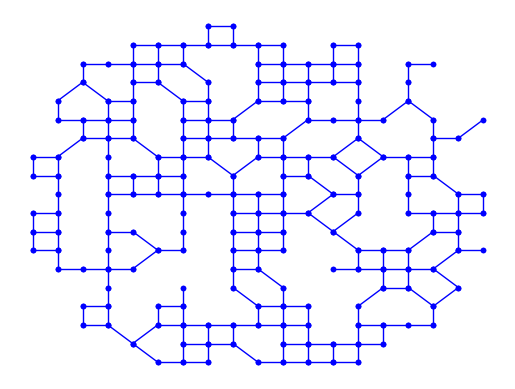

Graph for seed 8269 has 200 vertices and 281 edges


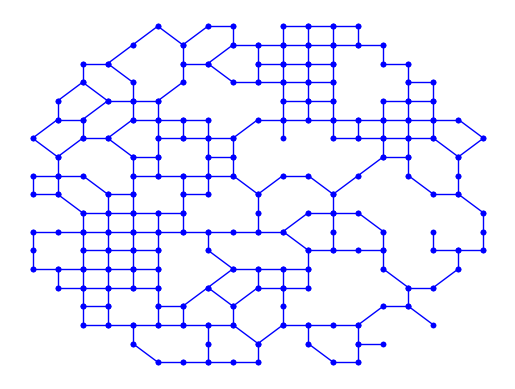

Graph for seed 8270 has 200 vertices and 278 edges


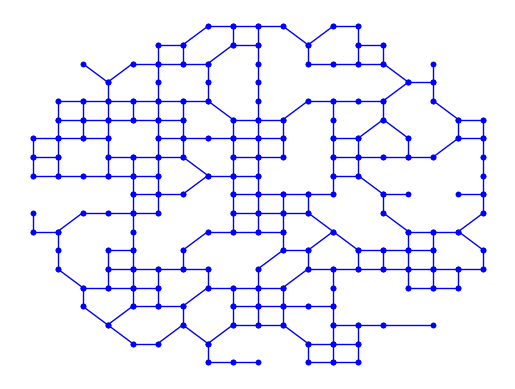

Graph for seed 8271 has 200 vertices and 279 edges


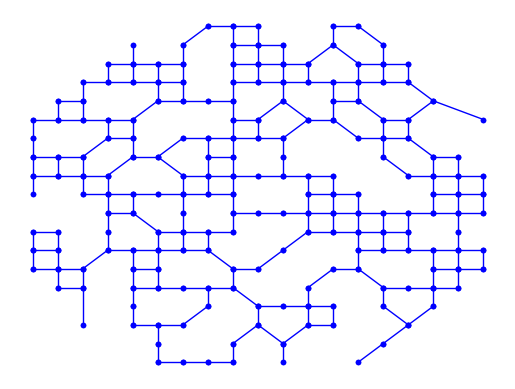

Graph for seed 8272 has 200 vertices and 273 edges


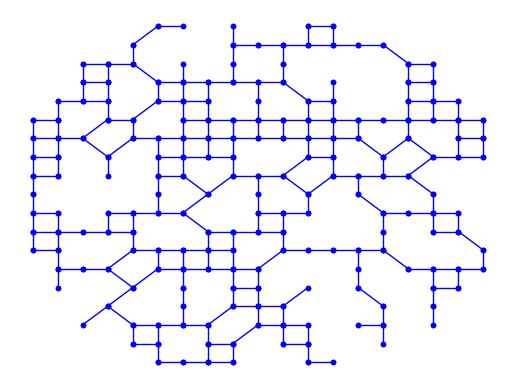

In [8]:
# Generate and plot graphs for multiple seeds
for i in range(8268, 8273):
    random.seed(i)
    P, E = generateGraph(200, 5000, 5000, 5000)
    print("Graph for seed", i, "has", len(P), "vertices and", len(E), "edges")
    plotGraph(P, E)
    plt.show()

#### the above graphs are generate using on a range of 8268 to 8273 seed values. Generating unique graphs with different seed values.  

### 1.3 Lists and Paths

In [9]:
def pathLength(P):
    """
    Function to calculate the length of a path represented by a list of vertices.

    Parameters:
    - P: List of vertices (points) representing the path.

    Returns:
    - Integer: Length of the path.
    """
    return 0 if len(P) <= 1 else dist(P[0], P[1]) + pathLength(P[1:])

In [10]:
def reverse(P):
    """
    Function to reverse a list.

    Parameters:
    - P: List to be reversed.

    Returns:
    - List: Reversed list.
    """
    return [P[-i] for i in range(1, len(P) + 1)]

In [11]:
def index(x, L):
    """
    Function to find the index of an element in a list.

    Parameters:
    - x: Element to be found.
    - L: List to search for the element.

    Returns:
    - Integer: Index of the element in the list, or None if the element is not found.
    """
    for i in range(len(L)):
        if x == L[i]: 
            return i
    return None

In [12]:
def addWithoutDuplicates(L, X):
    """
    Function to add elements from a list X to another list L without duplicates.

    Parameters:
    - L: List to which elements will be added.
    - X: List of elements to be added to L.

    Returns:
    - List: L with elements added from X without duplicates.
    """
    for i in range(len(X)):
        if X[i] not in L:
            L.append(X[i])
    return L

### 1.4 Generate Delivery Points

In [13]:
def splitEdgeRandomly(V, E, s):
    """
    Function to split an edge randomly by inserting a new vertex along the edge.

    Parameters:
    - V: List of vertices in the graph.
    - E: List of edges in the graph.
    - s: Edge to be split, represented as a tuple of two vertices.

    Returns:
    - Tuple: Updated list of vertices and edges after splitting the edge,
             along with the newly inserted vertex.
    """
    A, B = s
    p = random.uniform(0.3, 0.7)
    x = int(A[0] + p * (B[0] - A[0]))
    y = int(A[1] + p * (B[1] - A[1]))
    t = (x, y)
    E.remove(s)
    E.append((A, t))
    E.append((t, B))
    V.append(t)
    return (V, E), t

In [14]:
def addRandomTargets(V, E, n=5):
    """
    Function to add random targets along the edges of a graph.

    Parameters:
    - V: List of vertices in the graph.
    - E: List of edges in the graph.
    - n: Number of random targets to add (default is 5).

    Returns:
    - Tuple: Updated lists of vertices, edges, and the newly added targets.
    """
    V, E = V.copy(), E.copy()
    T = []
    # We want to ensure that the beginning of the
    # sequence of points generated randomly stays
    # the same
    mindist = 300
    while len(T) < n:
        s = random.choice(E)
        A, B = s
        if dist(A, B) > mindist:  # Avoid targets placed narrowly
            (V, E), t = splitEdgeRandomly(V, E, s)
            T.append(t)
    return sorted(V), sorted(E), sorted(T)

In [15]:
def addTargets(M, T):
    """
    Function to add targets to the graph by splitting edges and inserting target points.

    Parameters:
    - M: Tuple containing the list of vertices and edges in the graph.
    - T: List of target points to be added.

    Returns:
    - Tuple: Updated lists of vertices and edges after adding the targets.
    """
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t) + dist(t, Q) - dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove((P, Q))
        E.append((P, t))
        E.append((t, Q))
        V.append(t)
    return V, E

In [16]:
def generateRandomTargets(V, E, n=5):
    """
    Function to generate random targets along the edges of a graph.

    Parameters:
    - V: List of vertices in the graph.
    - E: List of edges in the graph.
    - n: Number of random targets to generate (default is 5).

    Returns:
    - List: Generated random targets.
    """
    V, E = V.copy(), E.copy()
    T = []
    # We want to ensure that the beginning of the
    # sequence of points generated randomly stays
    # the same
    mindist = 300
    while len(T) < n:
        s = random.choice(E)
        A, B = s
        if dist(A, B) > mindist:  # Avoid targets placed narrowly
            (_, _), t = splitEdgeRandomly(V, E, s)
            T.append(t)
    return sorted(T)

### 1.5 Plot Map with Delivery Route

In [17]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=7,
            text=None, grid=False):
    """
    Function to plot the map with delivery route.

    Parameters:
    - G: Graph composed of vertices and edges.
    - T: List of delivery targets.
    - P: List of points representing the delivery route.
    - W: Warehouse location.
    - style: Style of the graph edges (default is 'r-o').
    - lw: Line width of the graph edges (default is 1).
    - ms: Marker size of the graph vertices (default is 3).
    - styleT: Style of the delivery targets markers (default is 'go').
    - msT: Marker size of the delivery targets (default is 5).
    - styleP: Style of the delivery route (default is 'b-o').
    - lwP: Line width of the delivery route (default is 3).
    - msP: Marker size of the delivery route vertices (default is 1).
    - stylePT: Style of the delivery targets on the route (default is 'go').
    - msPT: Marker size of the delivery targets on the route (default is 7).
    - styleW: Style of the warehouse marker (default is 'bo').
    - msW: Marker size of the warehouse (default is 7).
    - text: Text annotation for the plot (default is None).
    - grid: Boolean flag to display grid (default is False).
    """
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot([p[0] for p in V], [p[1] for p in V], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot([p[0], q[0]], [p[1], q[1]], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot([t[0]], [t[1]], styleT, ms=msT)
    plt.plot([p[0] for p in P], [p[1] for p in P], styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot([p[0]], [p[1]], stylePT, ms=msPT)
    if W is not None:
        plt.plot([W[0]], [W[1]], styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8 * maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

### 1.6 Generate Data

In [18]:
def generateData(seed=None, nodes=100, customers=150, 
                 plot=False, log=False):
    """
    Generates data for simulation of delivery routes.

    Args:
    - seed (int): The seed value for data generation. If None, prints usage instructions.
    - nodes (int): The number of intersections (vertices) in the generated map.
    - customers (int): The number of customers generated on the map.
    - plot (bool): Controls graphical output during data generation.
    - log (bool): Controls print output during data generation.

    Returns:
    - M ((list, list)): The generated map as a graph, consisting of vertices and edges.
    - C ((list, list)): A list of customer locations.
    - W ((int, int)): The location of the distribution warehouse.
    """

    if seed is None:
        # Print usage instructions
        print("Usage:  M, C = generateData(seed=None, ")
        print("                            nodes=100, customers=50, ")
        print("                            plot=False, log=False)")
        print("")
        print("  seed  the seed value to be used for data generation. ")
        print("        To test the application use seed=0, it will create")
        print("        a small map, with a very few customer locations and")
        print("        a small set of delivery data.")
        print("")
        print("  nodes the number of intersections (vertices) in the generated map")
        print("")
        print("  customers  the number of customers generated on the map")
        print("")
        print("  log   Controls print output during data generation.")
        print("")
        print("  plot  Controls graphical output during data generation.")
        print("")
        print("Returns:")
        print("")
        print("  M = (V, E) is the generated map given as a graph")
        print("    where V is a list of vertices, with each vertice ")
        print("    given as a pair (x, y) of integer coordinates, ")
        print("    and E is a list of edges, with each edge given")
        print("    as a pair (A, B) of vertices, with each vertex again")
        print("    given as a pair (x, y) of integer coordinates")
        print("")
        print("  W ∈ V  is the location of the distribution warehouse")
        print("    given as a pair (x, y) of integer coordinates")
        print("")
        print("  C is a list of customer locations")
        print("    given as pairs (x, y) of integer coordinates on or near")
        print("    existing edges E. To integrate a set of customer locations")
        print("    into a given map M = (V, E), use addTarget(M, C)")
        print("")
        
        seed = 0
    
    if seed==0:          # generate very simple test data 
        nodes = 20       # number of points in map
        customers = 5    # number of  customers
        grid = True
            
    else:
        grid = False
        
    random.seed(seed)
    
    V, E = generateGraph(nodes, 4000, 4000, 4000)
    
    W = random.sample(V, k=1)[0]
    
    VV, EE, C = addRandomTargets(V, E, customers)

    if log:
        print(f"Generated map with {nodes:d} nodes and " 
              f"{customers:d} customer locations")
    if plot:
        label="" if seed==0 else f"seed={seed:4d}"
        plotMap((V, E), T=C, W=W, text=label, grid=grid)
    
    return (VV, EE), (V, E), W, C

#### Data Generation is reproducible.

In [19]:
# Data Generation is reproducible

# Generate two sets of data using the same seed
D1 = generateData(8268)
D2 = generateData(8268)

# Check if the generated data sets are identical
D1 == D2

True

## 2 Generate Data

#### 2.1 Generating test data using seed 8268.

In [20]:
# Generate Data
# Generating test data using seed 8268

# Input:
# No arguments provided, defaults will be used

# Output:
# Usage message explaining the arguments and return values of the generateData function
# The function is intended to generate a map (M) with vertices (V) and edges (E),
# a distribution warehouse location (W), and a list of customer locations (C).
# The seed parameter controls the reproducibility of the generated data.
# Other parameters such as the number of nodes and customers can be adjusted.
# The function also provides options to log print output and plot the generated data.
# To generate a simple test dataset, use seed=0.
# Example usage: M, C = generateData(seed=0, nodes=100, customers=50, plot=True, log=True)

M, _, W, C = generateData()

Usage:  M, C = generateData(seed=None, 
                            nodes=100, customers=50, 
                            plot=False, log=False)

  seed  the seed value to be used for data generation. 
        To test the application use seed=0, it will create
        a small map, with a very few customer locations and
        a small set of delivery data.

  nodes the number of intersections (vertices) in the generated map

  customers  the number of customers generated on the map

  log   Controls print output during data generation.

  plot  Controls graphical output during data generation.

Returns:

  M = (V, E) is the generated map given as a graph
    where V is a list of vertices, with each vertice 
    given as a pair (x, y) of integer coordinates, 
    and E is a list of edges, with each edge given
    as a pair (A, B) of vertices, with each vertex again
    given as a pair (x, y) of integer coordinates

  W ∈ V  is the location of the distribution warehouse
    given as a pa

#### 2.2 Analysing Simple Test Data

Generated map with 20 nodes and 5 customer locations


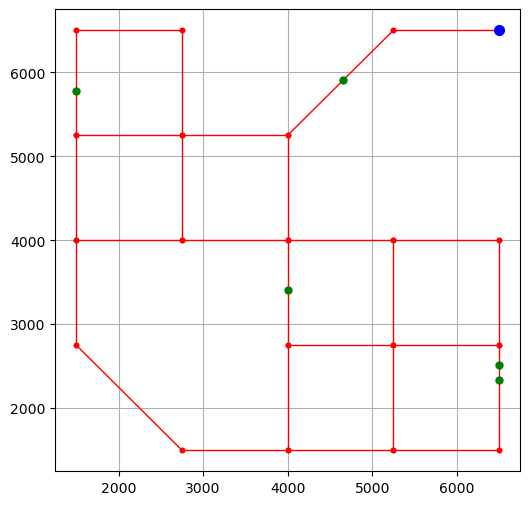

In [21]:
# data structure generation.
# Analysing Simple Test Data

# Generating test data using seed 0
# Log output will be displayed
# Plotting the generated data

# Input:
# Seed value is set to 0 to generate a simple test dataset
# Log parameter is set to True to display print output during data generation
# Plot parameter is set to True to visualize the generated data

# Output:
# Usage message explaining the arguments and return values of the generateData function
# The function generates a simple test dataset with a small map and a few customer locations
# The seed value is used to control the reproducibility of the generated data
# Print output displays the generated map with vertices, edges, distribution warehouse location, and customer locations
# The plot visualizes the generated map with customer locations

sampleData = generateData(seed=0, log=True, plot=True)

#### 2.2.1 The Graph

#### The following are the vertices of the graph.

In [22]:
V, E = M
V

[(1500, 2750),
 (1500, 4000),
 (1500, 5250),
 (1500, 5780),
 (1500, 6500),
 (2750, 1500),
 (2750, 4000),
 (2750, 5250),
 (2750, 6500),
 (4000, 1500),
 (4000, 2750),
 (4000, 3407),
 (4000, 4000),
 (4000, 5250),
 (4654, 5904),
 (5250, 1500),
 (5250, 2750),
 (5250, 4000),
 (5250, 6500),
 (6500, 1500),
 (6500, 2338),
 (6500, 2513),
 (6500, 2750),
 (6500, 4000),
 (6500, 6500)]

Interpretation:
The vertices represent intersection points or nodes in the graph.
Each vertex is represented by a pair of integer coordinates (x, y), indicating its position on a 2D plane.
The graph appears to be a grid-like structure with intersections located at regular intervals along the x and y axes.
The vertices are distributed in a grid pattern, forming a network of interconnected points that represent possible delivery locations.
These vertices will be used to construct the edges of the graph, defining the routes between delivery points.

In [23]:
E

[((1500, 2750), (1500, 4000)),
 ((1500, 2750), (2750, 1500)),
 ((1500, 4000), (2750, 4000)),
 ((1500, 5250), (1500, 4000)),
 ((1500, 5250), (1500, 5780)),
 ((1500, 5780), (1500, 6500)),
 ((2750, 5250), (1500, 5250)),
 ((2750, 5250), (2750, 4000)),
 ((2750, 5250), (2750, 6500)),
 ((2750, 6500), (1500, 6500)),
 ((4000, 1500), (2750, 1500)),
 ((4000, 2750), (4000, 1500)),
 ((4000, 3407), (4000, 2750)),
 ((4000, 4000), (2750, 4000)),
 ((4000, 4000), (4000, 3407)),
 ((4000, 4000), (4000, 5250)),
 ((4000, 4000), (5250, 4000)),
 ((4000, 5250), (2750, 5250)),
 ((4000, 5250), (4654, 5904)),
 ((4654, 5904), (5250, 6500)),
 ((5250, 1500), (4000, 1500)),
 ((5250, 1500), (6500, 1500)),
 ((5250, 2750), (4000, 2750)),
 ((5250, 2750), (5250, 1500)),
 ((5250, 2750), (5250, 4000)),
 ((5250, 2750), (6500, 2750)),
 ((5250, 4000), (6500, 4000)),
 ((6500, 2338), (6500, 1500)),
 ((6500, 2513), (6500, 2338)),
 ((6500, 2750), (6500, 2513)),
 ((6500, 2750), (6500, 4000)),
 ((6500, 6500), (5250, 6500))]

In [24]:
# Interpretation:
# The edges represent connections or paths between vertices in the graph.
# Each edge is represented as a pair of vertices (A, B), where A and B are tuples of integer coordinates (x, y).
# The edges define the routes or paths that can be taken from one vertex to another.
# The graph is represented as a list of edges, where each edge is a tuple containing the coordinates of its endpoints.
# These edges form the network of connections between the intersections or delivery points in the graph.

#### 2.2.2 Customer Addresses

#### the following are the customer addresses (green dots in the map) are:

In [25]:
# The following are the customer addresses (green dots in the map):

C

# Interpretation:
# Each customer address is represented as a tuple of integer coordinates (x, y).
# The green dots on the map represent the locations of the customers.
# These addresses indicate where deliveries need to be made or where services need to be provided.
# The customer addresses are distributed across different points in the graph, indicating the locations where customers are situated.

[(1500, 5780), (4000, 3407), (4654, 5904), (6500, 2338), (6500, 2513)]

In [26]:
#total customers
num_customers = len(C) # C contains customer's coordinates
num_customers

5

#### 2.2.3 The Warehouse Address

In [27]:
# The warehouse address is:

W 

# Interpretation:
# The warehouse address is represented as a tuple of integer coordinates (x, y).
# This address indicates the location of the distribution warehouse, which serves as the central point for managing deliveries.
# The warehouse is situated at coordinates (6500, 6500) on the map.
# This location is typically chosen strategically to optimize the distribution process, considering factors such as accessibility and proximity to the customer base.

(6500, 6500)

### 2.3 Real Sample Data

#### Displaying sample data from simulation

Generated map with 100 nodes and 150 customer locations


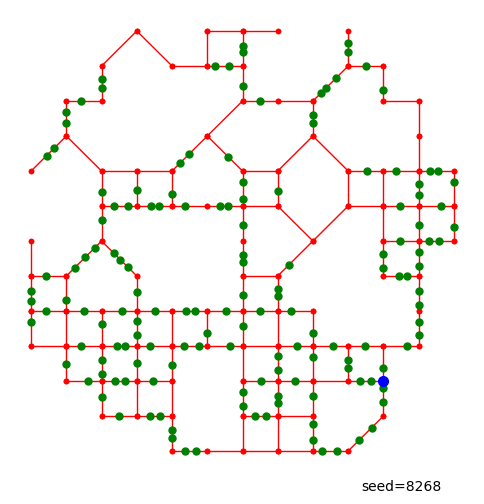

In [28]:
# Real Sample Data
# Displaying sample data from simulation

# Input:
data = generateData(8268, plot=True, log=True)

# Output:
# Generated map with 100 nodes and 150 customer locations

# Interpretation:
# The sample data represents a simulated map with 100 nodes, which are intersections or vertices, and 150 customer locations.
# This data is generated using a specific seed value (8268) for reproducibility.
# The plot visualization displays the generated map with vertices represented as red circles and edges connecting them.
# Additionally, customer locations are indicated by green dots on or near existing edges of the map.
# The log output confirms the successful generation of the map with the specified number of nodes and customer locations.
# This sample data can be further used for simulation and analysis in the context of delivery route optimization or similar applications.

In [29]:
# Save test data for customer locations
import pickle

# Input:
with open('customer_data.pickled', 'wb') as f:
    pickle.dump(data, f)

# Interpretation:
# This code snippet saves the generated sample data, including the map with vertices and customer locations, into a file named 'customer_data.pickled'.
# The data is serialized using the pickle module, allowing it to be stored in binary format for later retrieval and use in simulations or analysis.
# Saving the data enables easy access and reuse without the need to regenerate it each time, facilitating further experimentation and testing.

Generated map with 40 nodes and 20 customer locations


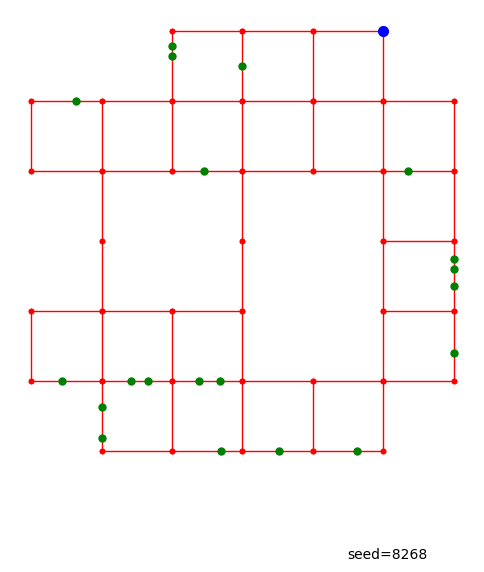

In [30]:
# Generate sample data with specific parameters
myData = generateData(8268, nodes=40, customers=20, plot=True, log=True)

# Interpretation:
# This code snippet generates sample data with 40 nodes and 20 customer locations using a specific seed value (8268).
# The parameters 'nodes' and 'customers' control the number of vertices in the map and the number of customer locations, respectively.
# By setting 'plot' to True, the code visualizes the generated map with customer locations.
# The log parameter is set to True, providing information about the generated map, including the number of nodes and customer locations.

#### Loading the sample data.

In [31]:
# Save generated data to a pickled file
with open('data1.pickled', 'wb') as f:
    pickle.dump(data, f)
    
# Interpretation:
# This code snippet saves the generated data (including the map, customer locations, and warehouse address) into a pickled file named 'customer_data.pickled'.
# The 'wb' mode is used for writing binary data to the file.
# The 'pickle.dump()' function is then called to serialize the data and store it in the file.

### 2.4 Generating Delivery Data

In [32]:
def generateDeliveryData(p, C, days, seed=0):
    """
    Generate delivery data according to the specified parameters.

    Parameters:
        p (float): Average number of parcels per day per customer.
        C (list): List of customer addresses.
        days (int): Number of days for which data are to be generated.
        seed (int): Seed value for random number generation. Default is 0.

    Returns:
        list: List of delivery schedules for each day.
    """
    np.random.seed(seed)
    # Generate the number of parcels for each day using Poisson distribution
    R = np.random.poisson(lam=len(C) * p, size=days)
    # Generate delivery schedules for each day
    D = [sorted(list(np.random.choice(range(len(C)), size=i))) for i in R]
    return D

#### Example

In [33]:
D = generateDeliveryData(p=0.2, C=C, days=5)
D

[[0, 1], [1], [4], [0, 3], [0, 3]]

In [34]:
sum([len(i) for i in D])

8

Over 5 days, a total of 8 parcels are to be delivered:
• On the first day deliver one parcel each to customers 0 and customer 1.
• On the second day deliver one parcel to customer 1.
• On the third day deliver one parcel to customer 4.
• On the fourth day deliver one parcel each to customers 0 and customer 3.
• And on the fith day deliver one parcel each to customers 0 and customer 3.

#### Delivery over one month for Sample Map

In [35]:
# Example usage of generateDeliveryData function
D = generateDeliveryData(p=0.2, C=C, days=5)
D

[[0, 1], [1], [4], [0, 3], [0, 3]]

This example demonstrates how to use the generateDeliveryData function.
It generates delivery data for 5 days (days=5) with an average of 0.2 parcels per day per customer (p=0.2) for the given list of customer addresses C.
The output D shows the delivery schedules for each day. For example, on the first day, parcels are to be delivered to customers with indices 0 and 1. Similarly, on the second day, only customer 1 receives a parcel, and so on.

In [36]:
sum([len(i) for i in D])

8

The total number of parcels scheduled for delivery over the 5 days is 32. This sum is obtained by adding the number of parcels scheduled for delivery on each day in the list D.

In [37]:
# The delivery data has been generated for 10 days with an average of 0.15 parcels per day per customer.
D = generateDeliveryData(p=0.15,C=C,days=10)

In [38]:
# generating delivery data for a total of ten days.
len(D)

10

In [39]:
# On the first day three parcels have to be delivered.
D[0]

[3]

In [40]:
# A total of twelve parcels are to be delivered over ten days.
sum([len(i) for i in D])

12

## 3 Finding the shortest path

#### 3.1 Generate Warehouse Location

In [41]:
import random

def generateWarehouseLocation(M):
    """
    Generate a single random warehouse location from the given map.

    Args:
    - M (tuple): A tuple containing the graph representation of the map.
                 It consists of vertices and edges, where vertices are
                 represented as a list of tuples and edges are represented
                 as a list of pairs of vertices.

    Returns:
    - W (tuple): A tuple representing the warehouse location, consisting
                 of x and y coordinates.

    """
    V, _ = M
    W = random.sample(V, k=1)[0]  # Sample a single vertex randomly
    return W

In [42]:
#data is already loaded so reload not need
# Set the random seed for reproducibility
random.seed(8268)

# Generate a single random warehouse location from the given map
W = generateWarehouseLocation(M)

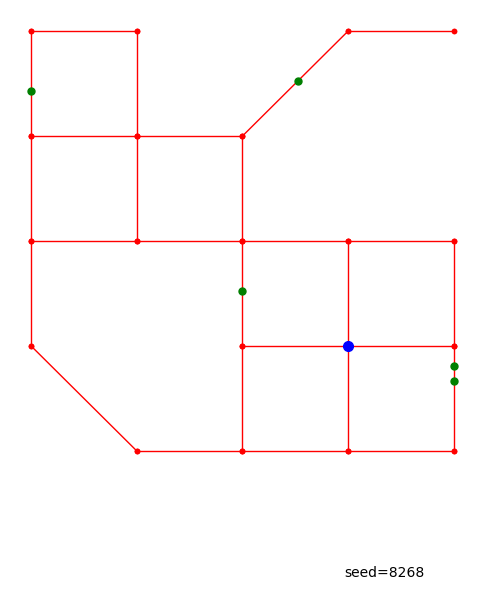

In [43]:
# Plotting the map with the customer locations and warehouse location.
plotMap(M, T=C, P=[], W=W, text="seed=8268")

#### 3.2 𝐴∗ algorithm for finding the shortest path.

In [44]:
def pathLength(P):
    """
    Calculate the length of a path defined by a list of points. 
    It recursively calculates the distance between consecutive points in the path and sums them up to find the total length of the path.
    The base case is when the path has only one point or no points, returning 0 in these cases.
    
    Args:
    - P (list): A list of points defining the path.

    Returns:
    - int: The length of the path.
    """
    return 0 if len(P) <= 1 else \
            dist(P[0], P[1]) + pathLength(P[1:])

In [45]:
def shortestPath(M, A, B):
    """
    Find the shortest path between two vertices in a graph using the A* algorithm.

    Args:
    - M (tuple): A tuple (V, E) representing the graph, where V is a list of vertices
                 and E is a list of edges represented as pairs of vertices.
    - A: Starting vertex of the path.
    - B: Ending vertex of the path.

    Returns:
    - list or None: A list representing the shortest path between A and B, or None if no path exists.
    """
    def h(p):
        """
        Heuristic function for estimating the remaining distance from a point to the goal.

        Args:
        - p (list): A list representing a path.

        Returns:
        - int: Heuristic value estimating the remaining distance to the goal.
        """
        return pathLength(p) + dist(p[-1], B)

    def insert(C, p):
        """
        Insert a path into the list of candidates C sorted by the heuristic value.

        Args:
        - C (list): List of candidate paths.
        - p (list): Path to be inserted.

        Returns:
        - list: Updated list of candidates with the new path inserted.
        """
        hp = h(p)
        c = (p, hp)
        for i in range(len(C)):
            if C[i][1] > hp:
                return C[:i] + [c] + C[i:]
        return C + [c]

    V, E = M
    assert (A in V and B in V)
    C = insert([], [A])

    while len(C) > 0:
        path, _ = C[0]
        C = C[1:]
        if path[-1] == B:
            return path
        else:
            for (x, y) in E:
                if path[-1] == x and y not in path:
                    C = insert(C, path + [y])
                elif path[-1] == y and x not in path:
                    C = insert(C, path + [x])
    return None

This function implements the A* algorithm to find the shortest path between two vertices in a graph.
It uses a heuristic function h to estimate the remaining distance from a point to the goal.
The insert function is used to insert a path into the list of candidates C sorted by the heuristic value.
The algorithm iteratively explores the paths with the lowest heuristic value until the goal vertex is reached or no more paths are available.
If a path between A and B exists, it returns the shortest path as a list of vertices. Otherwise, it returns None.

#### 3.3 Testing

In [46]:
# The shortest path from the first customer address to the last customer address
A = C[0]  # First customer address
B = C[-1]  # Last customer address

# Find the shortest path from A to B
shortest_path = shortestPath(M, A, B)

# Print the shortest path if it exists
if shortest_path:
    print("Shortest path from", A, "to", B, ":", shortest_path)
else:
    print("No path exists between", A, "and", B)

Shortest path from (1500, 5780) to (6500, 2513) : [(1500, 5780), (1500, 5250), (2750, 5250), (4000, 5250), (4000, 4000), (5250, 4000), (5250, 2750), (6500, 2750), (6500, 2513)]


In [47]:
# Adding targets A and B to the map M
MAB = addTargets(M, [A, B])

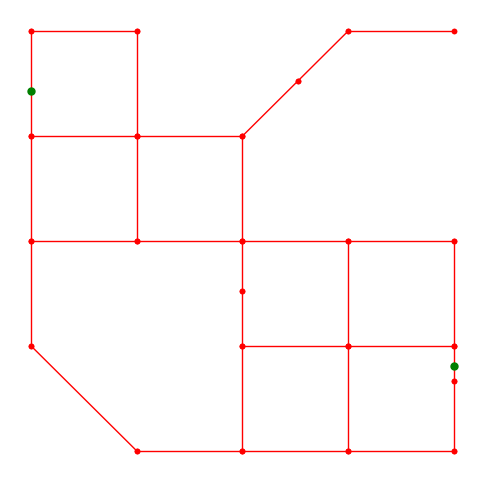

In [48]:
# Plotting the map MAB with targets A and B
plotMap(MAB, T=[A, B])

In [49]:
# Calculating the shortest path from point A to point B on the map MAB.
P = shortestPath(MAB, A, B)
P

[(1500, 5780),
 (1500, 5250),
 (2750, 5250),
 (4000, 5250),
 (4000, 4000),
 (5250, 4000),
 (5250, 2750),
 (6500, 2750),
 (6500, 2513)]

In [50]:
# Calculating the total length of the path.
pathLength(P)

8267

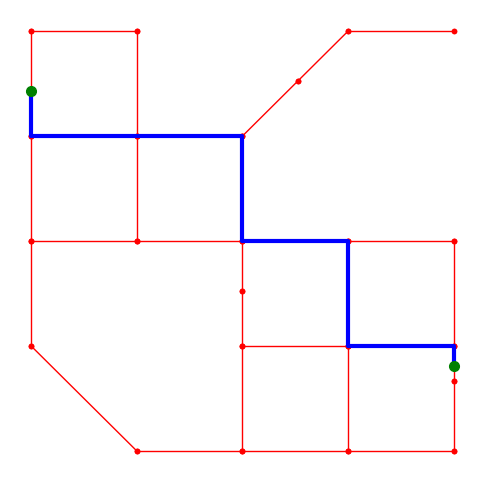

In [51]:
# Plotting the map.
plotMap(MAB, T=[A, B], P=P)

This call will generate a plot of the map with the following features:
- Red dots representing the vertices of the graph (intersections).
- Red lines representing the edges between vertices.
- Green dots representing the customer locations (points A and B).
- A blue line representing the shortest path from the warehouse (point A) to the destination (point B).

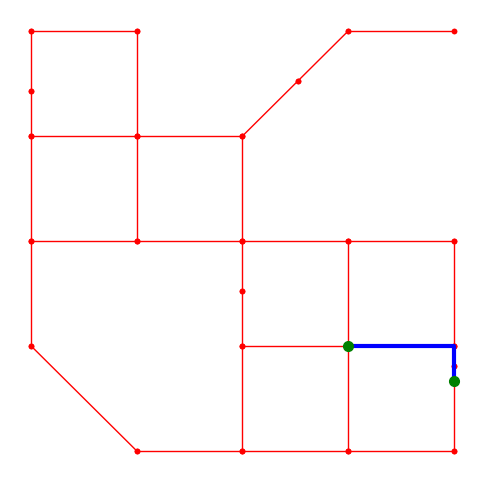

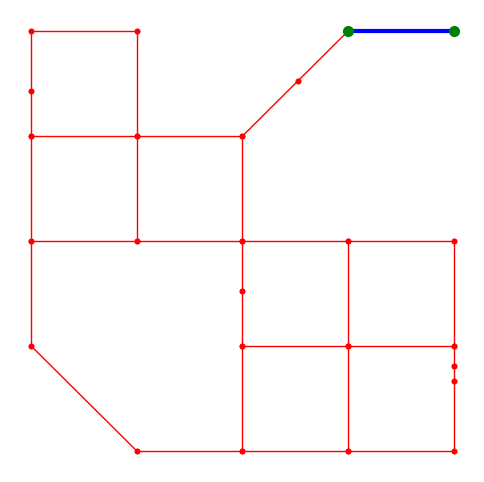

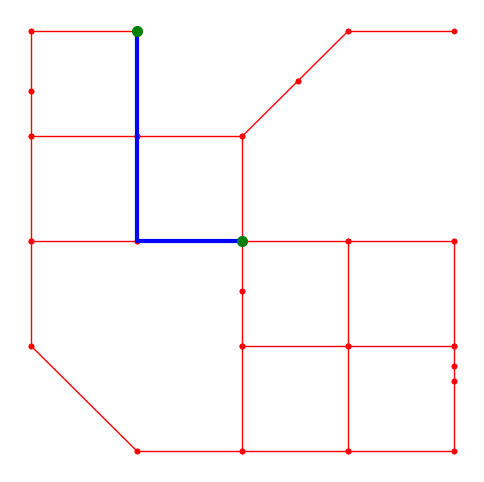

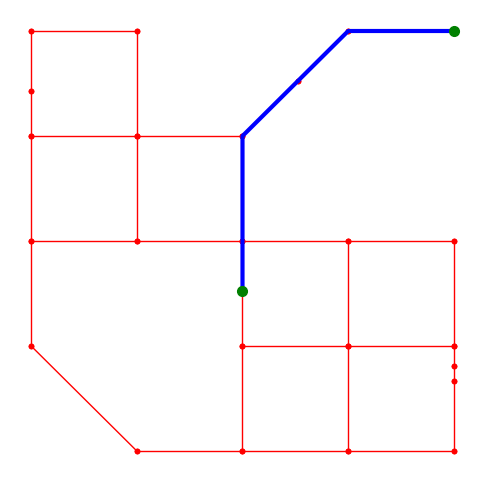

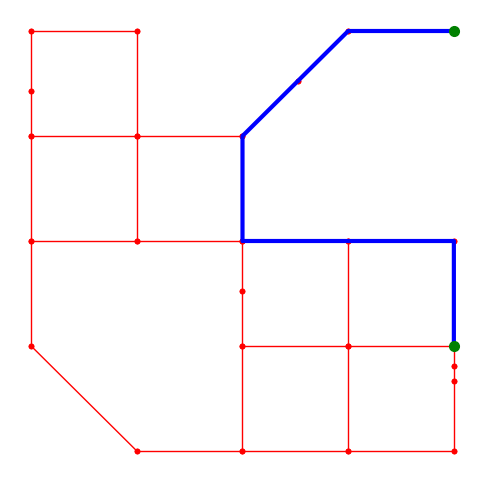

In [52]:
# Set the random seed for reproducibility.
random.seed(8268)  
# Unpack vertices and edges from the map data.
V, E = M  
for i in range(5):  # Loop to generate and plot paths for 5 random pairs of vertices.
    [A, B] = random.sample(V, k=2)  # Select two random vertices as the start (A) and end (B) points.
    MAB = addTargets(M, [A, B])  # Add targets (warehouse and customer locations) to the map.
    P = shortestPath(MAB, A, B)  # Find the shortest path from A to B on the modified map.
    plotMap(MAB, T=[A, B], P=P)  # Plot the map with targets (A and B), and the shortest path (P).

This code randomly selects pairs of vertices from the map, adds targets (warehouse and customer locations) to the map, finds the shortest path between the selected vertices considering the added targets, and then plots the map with the targets and the shortest path for visualization. This process is repeated five times to visualize different scenarios.

## 4 Finding the shortest delivery route

#### 4.1 The Algorithm

In [53]:
def createTables(M, T):
    # Function to reverse a path
    def reverse(P):
        return [P[-i] for i in range(1, len(P) + 1)]

    # Function to find the index of an element in a list
    def index(x, L):
        for i in range(len(L)):
            if x == L[i]:
                return i
        return None

    n = len(T)  # Number of targets
    d = [[math.inf for t in T] for t in T]  # Initialize distance matrix with infinity
    p = [[None for t in T] for t in T]  # Initialize path matrix with None
    for i in range(n):
        d[i][i] = 0  # Diagonal elements set to 0
        p[i][i] = [T[i]]  # Diagonal elements are the target themselves
    # Calculate distances and paths between targets
    for i in range(n):
        for j in range(n):
            if p[i][j] is None:  # If no path is calculated yet
                s = shortestPath(M, T[i], T[j])  # Find the shortest path between targets
                d[i][j] = d[j][i] = pathLength(s)  # Update distance matrix
                p[i][j] = s  # Update path matrix
                p[j][i] = reverse(s)  # Reverse the path for the opposite direction
                # Update intermediate paths and distances
                for m in range(len(s) - 1):
                    smi = index(s[m], T)  # Index of the m-th element of the path
                    if smi is None:
                        continue
                    for l in range(m + 1, len(s)):
                        sli = index(s[l], T)  # Index of the l-th element of the path
                        if sli is None:
                            continue
                        sub = s[m:l + 1]  # Sub-path from m to l
                        if p[smi][sli] is None:  # If no path is calculated yet
                            p[smi][sli] = sub  # Update sub-path
                            p[sli][smi] = reverse(sub)  # Update reversed sub-path
                            d[smi][sli] = d[sli][smi] = pathLength(sub)  # Update sub-path length
    return d, p  # Return distance and path matrices
# This function creates tables containing distances and paths between all pairs of targets in the given map

In [54]:
def roundtrips(x, n):
    # Function to check if an element is in a list
    def isElem(x, l):
        for i in range(len(l)):
            if l[i] == x:
                return True
        return False

    # Function to find the starting point of trips
    def startpoint(trips):
        for i in range(n):
            for t in trips:
                if isElem(i, t):
                    break
            else:
                return i

    # Function to calculate the total length of trips
    def totalLength(trips):
        s = 0
        for i in range(0, len(trips)):
            s += len(trips[i]) - 1
        return s

    trips = []
    # While total length of trips is less than n
    while totalLength(trips) < n:
        start = startpoint(trips)  # Get starting point of new trip
        trip = [start]
        i = start
        # Build the trip
        while len(trip) < n - totalLength(trips):
            for j in range(0, n):
                if pulp.value(x[i][j]) == 1:
                    trip.append(j)
                    i = j
                    break
            # Check if returning to the starting point
            if pulp.value(x[trip[-1]][start]) == 1:
                trip.append(start)
                break
        trips.append(trip)
    # Sort trips by length in descending order
    return sorted(trips, key=lambda t: len(t), reverse=True)


def createLoop(M, T):
    # Generate distance and path tables
    D, P = createTables(M, T)
    n = len(T)  # Number of targets
    # Create decision variables
    x = pulp.LpVariable.dicts("x", (range(n), range(n)), lowBound=0, upBound=1, cat=pulp.LpInteger)
    # Create optimization problem
    prob = pulp.LpProblem("Loop", pulp.LpMinimize)
    # Add objective function
    prob += pulp.lpSum([D[i][j] * x[i][j] for i in range(n) for j in range(n)])
    # Add constraints
    for j in range(n):
        prob += pulp.lpSum([x[i][j] for i in range(n) if i != j]) == 1
    for i in range(n):
        prob += pulp.lpSum([x[i][j] for j in range(n) if i != j]) == 1
    for i in range(n):
        for j in range(n):
            if i != j:
                prob += x[i][j] + x[j][i] <= 1
    # Initialize solver
    solvers = pulp.listSolvers(onlyAvailable=True)
    solver = pulp.getSolver(solvers[0], msg=0)
    # Solve the problem
    prob.solve(solver)
    # Get round trips
    trips = roundtrips(x, n)
    # Loop until only one trip remains
    while len(trips) > 1:
        # Add constraints to ensure round trips
        for t in trips:
            prob += pulp.lpSum([x[t[i]][t[i + 1]] + x[t[i + 1]][t[i]] for i in range(0, len(t) - 1)]) <= len(t) - 2
        # Solve the problem again
        prob.solve(solver)
        # Get round trips
        trips = roundtrips(x, n)
    # Get the final trip
    trip = trips[0]
    loop = []
    # Construct the loop from the path
    for k in range(len(trip) - 1):
        sub = P[trip[k]][trip[k + 1]]
        loop += sub if len(loop) == 0 else sub[1:]
    return loop

# This function aims to create a loop that passes through all targets exactly once.
# It first creates decision variables, adds an objective function and constraints to the optimization problem, and then solves it to find the optimal loop.
# The function iterates until only one trip remains, adding constraints to ensure the loop is round-trip.
# Finally, it constructs the loop from the path obtained.

#### 4.2 Testing

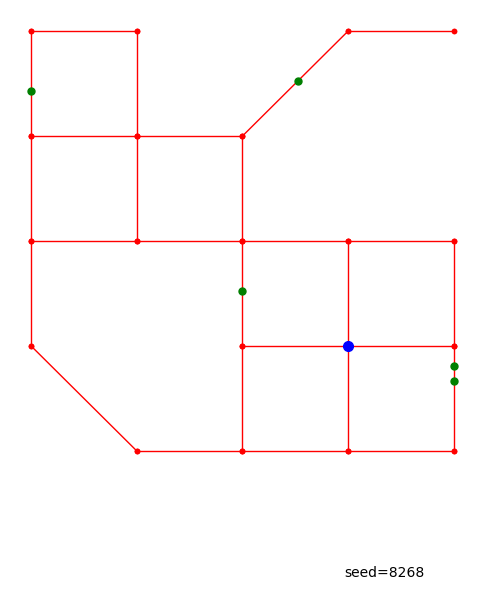

In [55]:
# Applying the previously generated warehouse location.
plotMap(M, T=C, P=[], W=W, text="seed=8268")

#### 4.2.1 Delivery to 75 Customers

In [56]:
random.seed(8268)
#randomly sampling 75 customer locations from C for testing
T = random.sample(C, k=len(C)//2) #150 customers total

In [57]:
# Adding randomly selected customer locations (T) to the original map (M)
MC = addTargets(M, T)

In [58]:
# Measuring the time taken to generate the roundtrip
start_time = time.time()  # Record the start time
P = createLoop(MC, [W]+T)  # Generate the roundtrip
end_time = time.time()    # Record the end time

# Calculate the elapsed time
elapsed_time = end_time - start_time
elapsed_time  # Output the elapsed time

0.04300069808959961

In [59]:
# The Warehouse location.
W

(5250, 2750)

In [60]:
# This output represents the shortest loop that starts and ends at the warehouse (4000, 7024) while visiting all the selected customer locations.
# The loop consists of a sequence of coordinate points that represent the path taken by the delivery route.
# Each coordinate pair represents a location visited in the loop.
P

[(5250, 2750),
 (6500, 2750),
 (6500, 2513),
 (6500, 2750),
 (6500, 4000),
 (5250, 4000),
 (4000, 4000),
 (4000, 5250),
 (4654, 5904),
 (4000, 5250),
 (4000, 4000),
 (5250, 4000),
 (5250, 2750)]

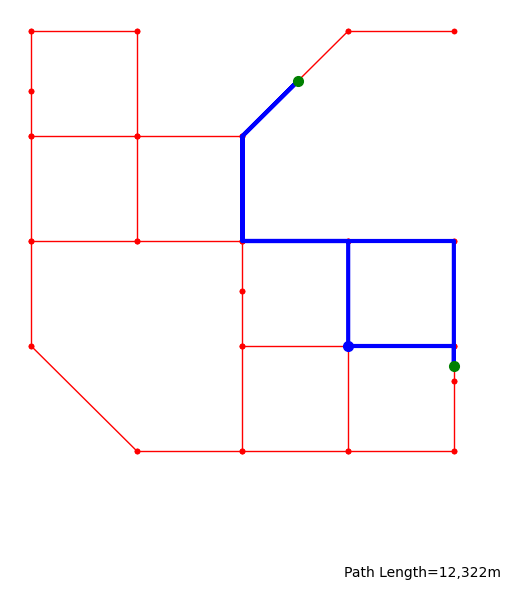

In [61]:
plotMap(MC, T=T, W=W, P=P, text=f"Path Length={pathLength(P):3,d}m")

#### 4.2.2 Delivery to all Customers

In [62]:
# Set the list of customers (delivery points) to be equal to all customers in the dataset
T = C

In [63]:
# Add delivery targets for all customers to the map
MC = addTargets(M, T)

In [64]:
# Create a loop that visits the warehouse and all customer locations
P = createLoop(MC, [W] + T)

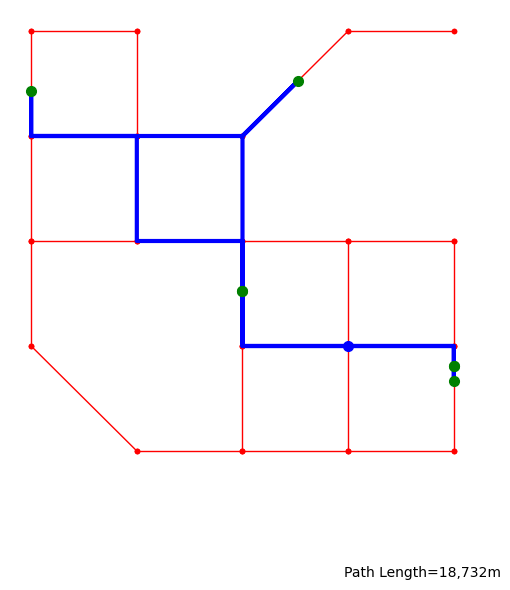

In [65]:
# Plot the map showing the warehouse, customer locations, and the delivery path
plotMap(MC, T=T, W=W, P=P, text=f"Path Length={pathLength(P):3,d}m")

#### 4.2.3 Running the Algorithm on Real Data

In [66]:
## main code for running simulation
with open('customer_data.pickled', 'rb') as f:
    M, _, W, C= pickle.load(f)

In [67]:
# Set the random seed for reproducibility and generate a warehouse location
random.seed(8268)
W = generateWarehouseLocation(M)

In [68]:
# There are 150 customers in the dataset.
len(C)

150

In [69]:
# Randomly selecting 1/5th of the customers for delivery.
random.seed(0)
T = random.sample(C, k=len(C)//5)

In [70]:
# Adding delivery targets for the selected customers.
MT = addTargets(M, T)

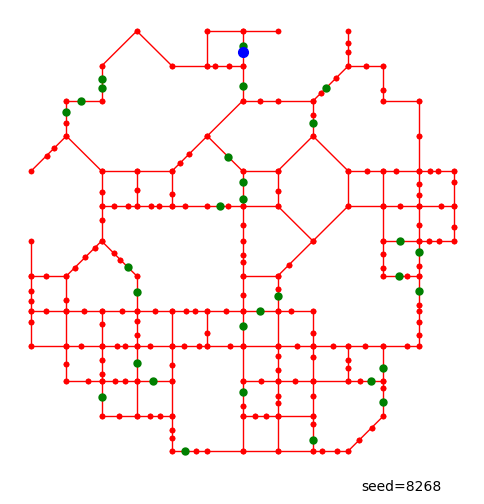

In [71]:
# Plotting the map with the warehouse, selected customer targets, and no path.
plotMap(MT, T=T, W=W, P=[], text=f"seed=8268")

In [72]:
# Creating a loop path using the A* algorithm for the warehouse and selected customer targets.
PT = createLoop(MT, [W]+T)

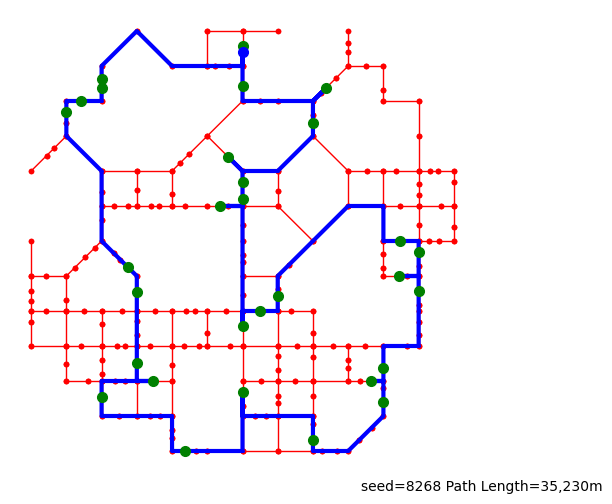

In [73]:
# Plotting the map with the warehouse, selected customer targets, and the generated loop path.
plotMap(MT, T=T, W=W, P=PT, text=f"seed=8268 Path Length={pathLength(PT):3,d}m")

In [74]:
# Setting the seed for reproducibility and generating a warehouse location.
random.seed(12)
W2 = generateWarehouseLocation(M)

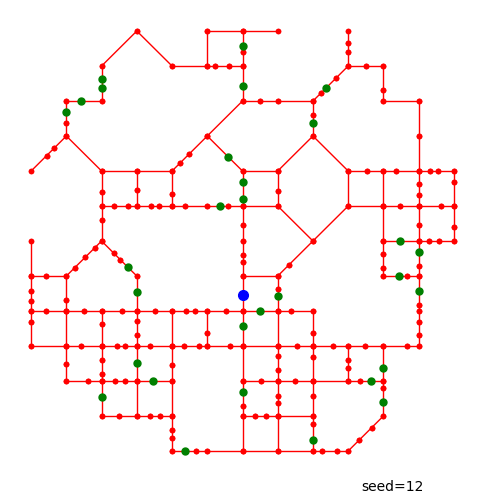

In [75]:
# Plotting the map with the new warehouse location.
plotMap(MT, T=T, W=W2, P=[], text=f"seed=12")

In [76]:
# Creating the delivery route using the new warehouse location.
P2 = createLoop(MT, [W2]+T)

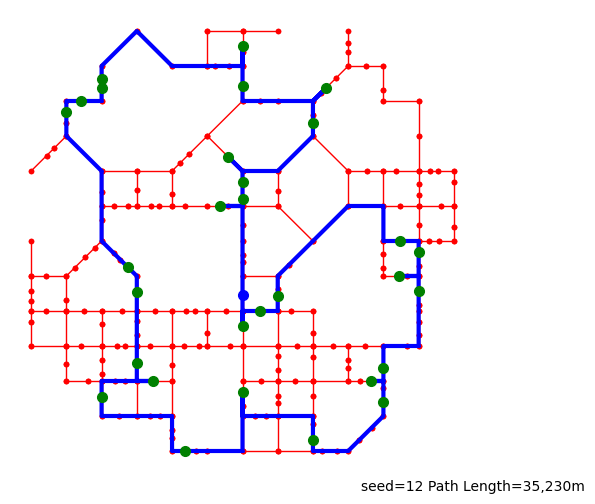

In [77]:
# Plotting the map with the delivery route using the new warehouse location.
plotMap(MT, T=T, W=W2, P=P2, text=f"seed=12 Path Length={pathLength(P2):3,d}m")

#### 4.3 Monte-Carlo Optimisation

This is an optimisation for the case of a fixed given number of customers to be served in one loop.

In [78]:
def monte_carlo(M, T, k=math.inf, timing=False, plot=False):
    """
    Perform Monte Carlo optimization for the given map and target points.

    Parameters:
        M (tuple): The map tuple containing vertices and edges.
        T (list): The list of target points (customers).
        k (int, optional): The maximum number of sampled warehouse locations. Defaults to math.inf.
        timing (bool, optional): Whether to print timing information. Defaults to False.
        plot (bool, optional): Whether to plot the result. Defaults to False.

    Returns:
        tuple: The coordinates of the optimized warehouse location.
    """
    if timing:
        start_time = time.time()
    V, _ = M
    W = sorted(random.sample(V, k=min(len(V), k)))
    MT = addTargets(M, T)
    minL, minP, minW = math.inf, None, None
    for w in W:
        if minP is not None and w in minP:
            # any point on the current shortest loop will generate the same loop
            continue
        P = createLoop(MT, [w]+T)
        L = pathLength(P)
        if L<minL:
            minL, minP, minW = L, P, w
            print(f"path length: {L:6,d}m")
        if timing:
            print(f"     iteration:  {time.time()-start_time:6.2f}s")
    if plot:
        plotMap(MT, T=T, W=minW, P=minP, text=f"seed=8288 Path Length={minL:8.1f}m")
    return minW

pathlength: 38,004m
     iteration:   14.48s
     iteration:   26.70s
     iteration:   38.64s
     iteration:   55.29s
     iteration:   67.34s
pathlength: 37,930m
     iteration:   76.45s
     iteration:   85.60s
pathlength: 36,810m
     iteration:  119.02s
     iteration:  129.58s
     iteration:  137.75s
pathlength: 36,350m
     iteration:  156.07s
     iteration:  176.92s
     iteration:  189.15s
     iteration:  200.10s
     iteration:  217.49s
     iteration:  228.88s
     iteration:  240.95s
     iteration:  253.30s
     iteration:  265.88s
pathlength: 35,960m
     iteration:  281.79s
pathlength: 35,676m
     iteration:  305.27s
pathlength: 35,546m
     iteration:  320.18s
pathlength: 35,230m
     iteration:  335.25s
     iteration:  351.53s
     iteration:  385.32s
     iteration:  396.85s
     iteration:  408.16s
     iteration:  418.89s
     iteration:  436.85s
     iteration:  458.51s
     iteration:  473.51s
     iteration:  494.95s
     iteration:  516.26s
     iteration:

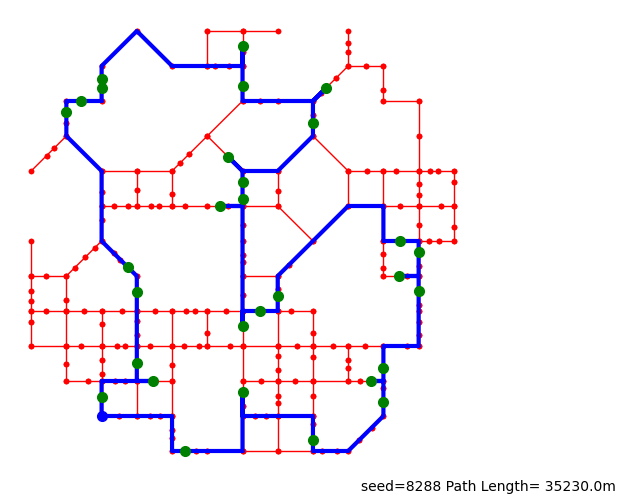

(1760, 1200)

In [79]:
random.seed(8268)
monte_carlo(M, T, timing=True, plot=True)

## 5 Time Handling

**Convention:** In this project we measure time in seconds. The simulation will start at 0:00. Time related methods will be added as they are needed.

`timestamp(t)` generates a timestamp string in the form `[dd] hh:mm:ss.d`

In [98]:
def timestamp(t):
    # Calculate the number of days from the input time t
    day = int(t) // (24 * 3600)
    
    # Subtract the number of seconds equivalent to the calculated number of days from the input time t
    t = t - day * 24 * 3600
    
    # Calculate the number of hours from the remaining time t
    hour = int(t) // 3600
    
    # Subtract the number of seconds equivalent to the calculated number of hours from the remaining time t
    t = t - hour * 3600
    
    # Calculate the number of minutes from the remaining time t
    mins = int(t) // 60
    
    # Subtract the number of seconds equivalent to the calculated number of minutes from the remaining time t
    t = t - mins * 60
    
    # Calculate the number of seconds from the remaining time t
    secs = int(t)
    
    # Calculate tenths of a second by rounding the remaining fractional part of the input time t
    t = int(round((t - secs) * 10))
    
    # Return the formatted timestamp string
    return f"[{day:2d}] {hour:02d}:{mins:02d}:{secs:02d}.{t:1d}"

# This function essentially converts the input time 't' in seconds into a human-readable timestamp string.

In [81]:
timestamp(24*3600*3+17*3600+615.1)

'[ 3] 17:10:15.1'

The formatted timestamp is '[ 3] 17:10:15.1', indicating that it's the 3rd day, 17th hour, 10th minute, 15 seconds, and 1 tenth of a second.

In [100]:
def nextHour(env, hour):
    """
    Calculates the time until the next specified hour in the simulation environment.

    Args:
        env (simpy.Environment): Simpy environment object representing the simulation environment.
        hour (int): The target hour for which the function calculates the time until.

    Returns:
        float: The time (in seconds) until the next specified hour.
    """
    # Calculate the beginning of the current day
    beginningOfDay = int(env.now // (24 * 3600)) * 24 * 3600
    # Calculate the time of the day
    timeOfDay = env.now - beginningOfDay
    # Check if the specified hour is ahead of the current time of the day
    if hour * 3600 > timeOfDay:
        # Return the time remaining until the specified hour
        return hour * 3600 - timeOfDay
    else:
        # Return the time remaining until the specified hour of the next day
        return hour * 3600 + 24 * 3600 - timeOfDay

In [101]:
def day(now):
    """
    Calculates the current day in the simulation environment based on the provided time.

    Args:
        now (float): The current time in seconds.

    Returns:
        int: The current day in the simulation.
    """
    # Calculate the current day based on the provided time
    return int(now // (24 * 3600))

## 6 Classes

### 6.1 Class Recorder

We will use a class Recorder as a reference point for capturing data during the simulation. There will be only one recorder. It will be created at the beginning of every simulation run. Every entity will carry a reference to the Recorder.

In [103]:
class Recorder:
    """
    Recorder class for capturing data during the simulation.

    Attributes:
        env (simpy.Environment): The simulation environment.
        M (list): List of map geometry.
        W (tuple): Warehouse location.
        C (list): List of customer locations.
        days (int): Number of simulation days.
        log (bool): Flag indicating whether to log events.
        plot (bool): Flag indicating whether to plot data.
        timing (bool): Flag indicating whether to record timing information.
        start_time (float): Start time of the simulation.
        last_time (float): Last recorded time.
        cum_timer (dict): Cumulative timing information.
        daily (pandas.DataFrame): DataFrame for daily records.
    """

    def __init__(self, env, M, W, C, days,
                 log=False, plot=False, timing=False):
        """
        Initializes the Recorder with simulation parameters and data structures.

        Args:
            env (simpy.Environment): The simulation environment.
            M (list): List of map geometry.
            W (tuple): Warehouse location.
            C (list): List of customer locations.
            days (int): Number of simulation days.
            log (bool, optional): Flag indicating whether to log events. Defaults to False.
            plot (bool, optional): Flag indicating whether to plot data. Defaults to False.
            timing (bool, optional): Flag indicating whether to record timing information. Defaults to False.
        """
        self.env = env
        self.M = M
        self.W = W
        self.C = C
        self.days = days
        self.log = log
        self.plot = plot
        self.timing = timing
        self.start_time = time.time()
        self.last_time = self.start_time
        self.cum_timer = {}

        Customer.REGISTER = []
        Parcel.REGISTER = []

        # Create a data frame for records per working day
        self.daily = pd.DataFrame()
        self.daily['begin work at'] = [None] * days
        self.daily['end work at'] = [None] * days
        self.daily['dist'] = [None] * days
        self.daily['left'] = [None] * days

    def timer(self, s):
        """
        Records the timing information for a specific event.

        Args:
            s (str): Event description.
        """
        t = time.time()
        Δt = t - self.last_time
        if self.timing:
            print(f"==== t: {t - self.start_time:6.2f}s Δt: {Δt:6.2f}s [{s:s}]")
        if s in self.cum_timer:
            self.cum_timer[s] += Δt
        else:
            self.cum_timer[s] = Δt
        self.last_time = t

    def reportTimer(self):
        """Prints the accumulated timing information."""
        print(f"==== t: {self.total_time:6.2f}s Total")
        for k in sorted(self.cum_timer, key=lambda x: self.cum_timer[x], reverse=True):
            print(f"==== ΣΔt: {self.cum_timer[k]:6.2f}s " + k)

    def trace(self, event):
        """
        Logs the event if logging is enabled.

        Args:
            event (str): Event description.
        """
        if self.log:
            print(timestamp(self.env.now), event)

    def recordDriverBeginsWork(self):
        """Records the driver's arrival for work."""
        self.trace("Driver arrives for work")
        self.daily.at[day(self.env.now), 'begin work at'] = int(round(self.env.now))

    def recordDriverEndsWork(self):
        """Records the driver's departure from work."""
        self.trace("Driver goes home")
        self.daily.at[day(self.env.now), 'end work at'] = int(round(self.env.now))

    def recordTourLength(self, length):
        """
        Records the length of the daily tour.

        Args:
            length (int): Length of the tour.
        """
        self.daily.at[day(self.env.now), 'dist'] = int(length)

    def recordParcelsLeftOver(self, numberOfParcels):
        """
        Records the number of left-over parcels for the next day.

        Args:
            numberOfParcels (int): Number of left-over parcels.
        """
        self.trace(f"{numberOfParcels:d} left over for next day")
        self.daily.at[day(self.env.now), 'left'] = numberOfParcels

    def finish(self):
        """Finishes the simulation and calculates statistics."""
        self.total_time = time.time() - self.start_time
        self.daily['working time'] = (self.daily['end work at'] - self.daily['begin work at']) // 60
        # Simulation is finished for good
        # By removing the simulation environment we can pickle recorder
        self.env = None

    def __stats__(self, column):
        """
        Calculates statistics for the specified column in the daily DataFrame.

        Args:
            column (str): Column name.

        Returns:
            tuple: Tuple containing mean, median, and standard deviation of the specified column.
        """
        d = self.daily[column].copy()
        return d.mean(), d.median(), d.std()

    def statsWorkingTime(self):
        """Calculates statistics for daily working time."""
        return self.__stats__('working time')

    def histWorkingTime(self):
        """Plots a histogram for daily working time."""
        histplot(self.daily['working time'],
                 xlabel='Working Time [min]',
                 title='Daily Working Time')

    def plotWorkingTime(self):
        """Plots the daily working time."""
        dailyPlot(self.daily['working time'],
                  ylabel='Working Time [min]',
                  title='Daily Working Time')

    def statsTourLength(self):
        """Calculates statistics for daily tour length."""
        return self.__stats__('dist')

    def histTourLength(self):
        """Plots a histogram for daily tour length."""
        histplot(self.daily['dist'],
                 xlabel='Tour Length [m]',
                 title='Daily Tour Length')

    def plotTourLength(self):
        """Plots the daily tour length."""
        dailyPlot(self.daily['dist'],
                  ylabel='Tour Length [m]',
                  title='Daily Tour Length')

    def statsLeftOver(self):
        """Calculates statistics for daily left-over parcels."""
        return self.__stats__('left')

    def histLeftOver(self):
        """Plots a histogram for daily left-over parcels."""
        histplot(self.daily['left'],
                 xlabel='Left-Over Parcels',
                 title='Daily Left-Over Parcels')

    def plotLeftOver(self):
        """Plots the daily left-over parcels."""
        dailyPlot(self.daily['left'],
                  ylabel='Number of Parcels',
                  title='Daily Left-Over Parcels')

# The 'Recorder' class is used to capture data during the simulation.
# It maintains records of various events and statistics for analysis.
# Key methods include recording driver activities, tour lengths, and left-over parcels.
# It provides functionality to calculate statistics and plot histograms for daily working time, tour length, and left-over parcels.
# The class also includes methods for timing and logging events during the simulation.

### 6.2 Class Parcel

Parcels follow through a sequence of states:
- processing
- in transit (from manufacture to distribution centre)
- arrived in distribution centre
- ready for delivery 
- out for delivery
- customer not present
- returned to distribution centre
- delivered

In [104]:
class Parcel:
    """
    Class representing parcels in the delivery system.

    Attributes:
        REGISTER (list): List to keep track of all Parcel instances.
        rec (Recorder): Reference to the Recorder object.
        i (int): Row index in data frames of input data.
        dest (tuple): Destination location.
        custIndex (int): Index of the customer associated with the parcel.
        status (list): Record of parcel status.
        timing (list): Timing information for parcel status changes.
    """

    REGISTER = []

    def __init__(self, rec, i, cust, custIndex):
        """
        Initializes a Parcel object.

        Args:
            rec (Recorder): Reference to the Recorder object.
            i (int): Row index in data frames of input data.
            cust (Customer): Customer associated with the parcel.
            custIndex (int): Index of the customer.
        """
        self.rec = rec
        self.i = i  # row index in data frames of input data
        self.dest = cust.location
        self.custIndex = custIndex
        self.status = ['processing']  # status record and
        self.timing = [self.rec.env.now]  # timing
        assert (len(Parcel.REGISTER) == i)
        Parcel.REGISTER += [self]

    @staticmethod
    def getParcel(rec, i, location, custIndex):
        """
        Factory method to ensure only one Parcel instance per location.

        Args:
            rec (Recorder): Reference to the Recorder object.
            i (int): Row index in data frames of input data.
            location (tuple): Parcel destination location.
            custIndex (int): Index of the customer.

        Returns:
            Parcel: Existing or new Parcel object.
        """
        for p in Parcel.REGISTER:
            if p.i == i:
                return p
        return Parcel(rec, i, location, custIndex)

    def __str__(self):
        """
        Returns a string representation of the Parcel.

        Returns:
            str: String representation of the Parcel.
        """
        return f"Parcel: {self.i:3d} ({self.custIndex:3d})"

    def index(self):
        """
        Returns the row index of the Parcel in the data frames.

        Returns:
            int: Row index of the Parcel.
        """
        return self.i

    def destination(self):
        """
        Returns the destination location of the Parcel.

        Returns:
            tuple: Destination location of the Parcel.
        """
        return self.dest

    def __reg(self, state):
        """
        Records the status change of the Parcel.

        Args:
            state (str): New status of the Parcel.
        """
        self.status += [state]
        self.timing += [self.rec.env.now]
        self.rec.trace(str(self) + " " + state)

    def arrivedAtDeliveryCentre(self):
        """Records when the Parcel arrives at the delivery centre."""
        self.__reg('arr at delivery centre')

    def outForDelivery(self):
        """Records when the Parcel is out for delivery."""
        self.__reg('out for delivery')

    def returnFromDelivery(self):
        """Records when the Parcel is returned from delivery."""
        self.__reg('return from delivery')

# The 'Parcel' class represents parcels in the delivery system.
# It maintains records of parcel status changes and timing information.
# Parcels go through a sequence of states including processing, in transit, arrived, ready for delivery, out for delivery, customer not present, returned, and delivered.
# The 'getParcel' method ensures that there is only one Parcel instance per location.
# Methods like 'arrivedAtDeliveryCentre', 'outForDelivery', and 'returnFromDelivery' record specific events in the lifecycle of a parcel.

### 6.3 Class Customer

In [106]:
class Customer:
    """
    Class representing customers in the delivery system.

    Attributes:
        REGISTER (list): List to keep track of all Customer instances.
        rec (Recorder): Reference to the Recorder object.
        location (tuple): Location of the customer.
        i (int): Index of the customer.
        atHome (bool): Indicates if the customer is at home.
        answersDoor (bool): Indicates if the customer answers the door.
        parcelsReceived (list): List of parcels received by the customer.
    """

    REGISTER = []

    def __init__(self, rec, location):
        """
        Initializes a Customer object.

        Args:
            rec (Recorder): Reference to the Recorder object.
            location (tuple): Location of the customer.
        """
        self.rec = rec
        self.location = location
        self.i = len(Customer.REGISTER)
        Customer.REGISTER += [self]
        self.atHome = True
        self.answersDoor = False
        self.parcelsReceived = []
        rec.env.process(self.process())

    def __str__(self):
        """
        Returns a string representation of the Customer.

        Returns:
            str: String representation of the Customer.
        """
        return f"Customer: {self.i:2d} {str(self.location):s}"

    @staticmethod
    def getCustomer(rec, location):
        """
        Factory method to ensure only one Customer instance per location.

        Args:
            rec (Recorder): Reference to the Recorder object.
            location (tuple): Location of the customer.

        Returns:
            Customer: Existing or new Customer object.
        """
        for c in Customer.REGISTER:
            if c.location == location:
                return c
        return Customer(rec, location)

    def leaveHouse(self):
        """Updates customer status when leaving the house."""
        assert (self.atHome and not self.answersDoor)
        self.atHome = False

    def returnHome(self):
        """Updates customer status when returning home."""
        assert (not self.atHome)
        self.atHome = True

    def answerDoor(self):
        """
        Simulates the customer answering the door.

        Yields:
            int: Time to wait before the customer answers the door.
        """
        if self.atHome:
            yield self.rec.env.timeout(random.expovariate(1 / AVERAGE_TIME_ANSWER_DOOR))
            self.rec.trace(str(self) + " answers door")
            self.answersDoor = True
        else:
            yield self.rec.env.timeout(WAIT_TIME_IF_CUSTOMER_DOESNT_ANSWER_DOOR)
            self.rec(str(self) + " not at home")

    def acceptParcel(self, parcel):
        """
        Records the acceptance of a parcel by the customer.

        Args:
            parcel (Parcel): Parcel received by the customer.
        """
        assert (self.answersDoor)
        self.parcelsReceived += [parcel]
        self.rec.trace(str(self) + " accepts " + str(parcel))

    def signOff(self):
        """Records the sign off action by the customer."""
        assert (self.answersDoor)
        self.rec.trace(str(self) + " signs off")
        self.answersDoor = False

    def process(self):
        """Simulates the customer's daily routine."""
        yield self.rec.env.timeout(nextHour(self.rec.env, 8))
        while day(self.rec.env.now) < self.rec.days:
            self.leaveHouse()
            yield self.rec.env.timeout(nextHour(self.rec.env, 18))
            self.returnHome()
            yield self.rec.env.timeout(nextHour(self.rec.env, 8))

# The 'Customer' class represents customers in the delivery system.
# It maintains records of customer status including whether they are at home and if they answer the door.
# Customers go through a daily routine of leaving and returning home, simulating their availability to receive parcels.
# Methods like 'answerDoor', 'acceptParcel', and 'signOff' simulate customer actions during parcel delivery.
# The 'process' method simulates the daily routine of customers, including leaving and returning home at specific times.

### 6.4 Class Driver

In [108]:
class Driver:
    """
    Class representing drivers in the delivery system.

    Attributes:
        rec (Recorder): Reference to the Recorder object.
        DC (DeliveryCentre): Reference to the DeliveryCentre object.
        location (tuple): Current location of the driver.
        parcels (list): List of parcels assigned to the driver.
        tour (list): List representing the tour route for delivery.
        returns (list): List of parcels returned by customers.
    """

    def __init__(self, rec, DC):
        """
        Initializes a Driver object.

        Args:
            rec (Recorder): Reference to the Recorder object.
            DC (DeliveryCentre): Reference to the DeliveryCentre object.
        """
        self.rec = rec
        self.DC = DC
        self.location = None
        self.parcels = None
        self.tour = None
        self.rec.env.process(self.process())

    def __drive(self, target):
        """
        Simulates the driving activity of the driver.

        Args:
            target (tuple): Target location to drive to.

        Yields:
            int: Time to drive to the target location.
        """
        assert (self.tour[0] == self.location)
        while self.location != target:
            d = dist(self.location, self.tour[1])
            yield self.rec.env.timeout(d / AVERAGE_SPEED)
            self.location = self.tour[1]
            self.tour = self.tour[1:]
        assert (self.tour[0] == self.location == target)

    def arriveForWork(self):
        """Prepares the driver for work."""
        self.location = self.DC.W
        self.parcels = []
        self.returns = []
        self.tour = [self.DC.W]
        self.rec.recordDriverBeginsWork()

    def leaveForDelivery(self, tour, parcels):
        """
        Sets up the driver for leaving to deliver parcels.

        Args:
            tour (list): Tour route for delivery.
            parcels (list): Parcels to be delivered.
        """
        self.tour, self.parcels = tour, parcels
        self.rec.trace(f"Driver leaves for delivery " \
                       f"of {len(parcels):d} parcels")

    def process(self):
        """Simulates the driver's daily routine."""
        yield self.rec.env.timeout(nextHour(self.rec.env, 18))
        while day(self.rec.env.now) < self.rec.days:
            self.arriveForWork()
            tour, parcels = self.DC.sendForDelivery()
            yield self.rec.env.timeout(PREP_TIME_PER_PARCEL * len(parcels))
            self.rec.recordTourLength(pathLength(tour))
            self.leaveForDelivery(tour, parcels)
            while len(self.parcels) > 0:
                custLocation = self.parcels[0].dest
                cust = Customer.getCustomer(self.rec, custLocation)
                self.rec.trace("Driver drives to " + str(cust))
                yield from self.__drive(custLocation)
                self.rec.trace("Driver arrived at " + str(cust))
                yield from cust.answerDoor()
                if cust.answersDoor:
                    while len(self.parcels) > 0 and \
                            custLocation == self.parcels[0].dest:
                        cust.acceptParcel(self.parcels[0])
                        yield self.rec.env.timeout(random.expovariate(1 / 10))
                        self.parcels = self.parcels[1:]
                    cust.signOff()
                    yield self.rec.env.timeout(random.expovariate(1 / 10))
                else:
                    while len(self.parcels) > 0 and \
                            custLocation == self.parcels[0].dest:
                        self.returns += self.parcels[0]
                        self.parcels = self.parcels[1:]

            self.rec.trace("Driver returns to delivery centre")
            yield from self.__drive(self.DC.W)
            self.rec.trace("Driver arrived at delivery centre")

            for parcel in self.returns:
                self.DC.returnFromDelivery(parcel)
                yield self.rec.env.timeout(RETURN_TIME_PER_PARCEL)
            yield self.rec.env.timeout(600)
            self.rec.recordParcelsLeftOver(len(self.DC.parcels) +
                                           len(self.DC.leftOver))
            self.rec.recordDriverEndsWork()
            self.rec.trace(self.DC.inventory())
            yield self.rec.env.timeout(nextHour(self.rec.env, 18))

# The 'Driver' class represents drivers in the delivery system.
# It simulates the driver's daily routine including arriving for work, leaving for delivery, delivering parcels, and returning to the delivery center.
# The 'process' method governs the driver's actions during the simulation, coordinating with the DeliveryCentre and Customer objects.
# Methods like 'arriveForWork', 'leaveForDelivery', and '__drive' manage the driver's movement and parcel delivery process.
# The 'Driver' class plays a crucial role

### 6.5 Class Delivery Centre

In [109]:
class DeliveryCentre:
    """
    Class representing the delivery center in the system.

    Attributes:
        rec (Recorder): Reference to the Recorder object.
        M (list): List representing the map.
        W (tuple): Warehouse location.
        limit (int): Limit for the tour length.
        leftOver (list): List of parcels left over from previous deliveries.
        parcels (list): List of parcels scheduled for delivery.
        dest (list): List of unique customer destinations.
        tour (list): Planned tour for delivery.
    """

    def __init__(self, rec, M, W):
        """
        Initializes a DeliveryCentre object.

        Args:
            rec (Recorder): Reference to the Recorder object.
            M (list): List representing the map.
            W (tuple): Warehouse location.
        """
        self.rec = rec
        self.M = M
        self.W = W
        self.limit = 35000
        self.leftOver = []
        self.parcels = []
        self.dest = []
        self.tour = [W]

    def __accept(self, parcel):
        """
        Internal method to accept parcels and update the tour.

        Args:
            parcel (Parcel): Parcel object to be accepted.
        """
        custLoc = parcel.dest
        if custLoc not in self.dest:
            start_time = time.time()
            MT = addTargets(self.M, self.dest + [custLoc])
            self.rec.timer("addTarget")
            S = createLoop(MT, [self.W] + self.dest + [custLoc])
            self.rec.timer("createLoop")
            if pathLength(S) < self.limit:
                self.parcels.append(parcel)
                self.dest += [custLoc]
                self.tour = S
            else:
                self.leftOver.append(parcel)
        else:
            self.parcels.append(parcel)

    def acceptParcel(self, parcel):
        """
        Accepts a parcel and adds it to the delivery center.

        Args:
            parcel (Parcel): Parcel object to be accepted.
        """
        parcel.arrivedAtDeliveryCentre()
        self.__accept(parcel)

    def sendForDelivery(self):
        """
        Sends parcels for delivery and updates the tour.

        Returns:
            list: Tour for delivery.
            list: Parcels to be delivered.
        """
        parcels = []
        tour = self.tour
        addresses = self.dest

        for i in range(1, len(tour) - 1):
            dest = tour[i]
            for p in self.parcels:
                if p.dest == dest and p not in parcels:
                    parcels.append(p)
                    p.outForDelivery()

        L = self.leftOver
        self.tour = [self.W]
        self.parcels = []
        self.leftOver = []
        self.dest = []
        for p in L:
            self.__accept(p)

        if self.rec.plot:
            plotMap(self.rec.M, T=addresses, P=tour, W=tour[0],
                    text=f"Day {day(self.rec.env.now):2d}, {pathLength(tour):,d}m")

        return tour, parcels

    def returnFromDelivery(self, parcel):
        """
        Returns a parcel from delivery.

        Args:
            parcel (Parcel): Parcel object to be returned.
        """
        parcel.returnFromDelivery()
        self.__accept(parcel)

    def getInventory(self):
        """
        Gets the inventory of parcels at the delivery center.

        Returns:
            str: Inventory string representation.
        """
        acc = ""
        for p in self.parcels:
            if len(acc) > 0:
                acc += ", "
            acc += f"{p.custIndex:d}"
        acc += " / "
        for p in self.leftOver:
            if len(acc) > 0:
                acc += ", "
            acc += f"{p.custIndex:d}"
        return acc

    def inventory(self):
        """
        Provides information about the current inventory at the delivery center.

        Returns:
            str: Inventory status.
        """
        return f"Delivery Centre Inventory: " \
               f"{len(self.parcels) + len(self.leftOver):d}"

## 7 Simulation

### 7.1 Parameters from Specification

The time required for driving is based on the distance between way points at an average speed of 15km/h.

In [110]:
# Speed conversion from km/h to m/s
AVERAGE_SPEED = 15 / 3.6

The **cumulative preparation time** (route planning and 
sorting of the parcels in the delivery order and 
packing the cargo-bike) is assumed to be 50 sec per 
parcel to be delivered.

In [111]:
# Time required for route planning, sorting parcels, and packing the cargo bike per parcel
PREP_TIME_PER_PARCEL = 50

**Additional assumption:** The time to **process returned parcels** in the delivery centre is 30 sec per parcel. 

In [112]:
# Time required to process returned parcels in the delivery center per parcel
RETURN_TIME_PER_PARCEL = 30

The average time to answer the door.

In [113]:
# Average time for a customer to answer the door
AVERAGE_TIME_ANSWER_DOOR = 40

In [114]:
# Wait time if the customer doesn't answer the door
WAIT_TIME_IF_CUSTOMER_DOESNT_ANSWER_DOOR = 60

Now, we will use the Delivery data generated for simulation earlier for the coming steps. 

In [115]:
# Number of days(D)
len(D)

10

In [116]:
def generateInputData(D, log=False):
    """
    Generates input data for the simulation based on the number of days and customer data.

    Args:
        D (list): List of lists representing customer data for each day.
        log (bool, optional): Flag to enable logging. Defaults to False.

    Returns:
        DataFrame: DataFrame containing input data for the simulation.
    """

    # Calculate the total number of customers
    R = [len(d) for d in D]
    N = sum(R)
    
    # Constants for time handling
    DAY_LENGTH = 24 * 3600    # measured in seconds
    DAY_START = 8 * 3600      # first delivery in the morning
    DAY_END = 17 * 3600       # last delivery during day time

    # Initialize DataFrame
    x = pd.DataFrame()
    x['iarr'] = [None] * N  # Inter-arrival time
    x['time'] = [None] * N  # Arrival time
    x['day'] = [None] * N   # Day index
    x['dest'] = [None] * N  # Destination (customer)

    current_day = 0
    last_time = 0
    i = 0

    # Generate data for each day
    for d in D: 
        if log:
            print("generating for day: ", current_day, D[current_day])

        time = current_day * DAY_LENGTH + DAY_START  # Current time for the day

        # Generate arrival times for each customer
        for c in d: 
            # Calculate inter-arrival time based on the number of customers for the current day
            IARR = (DAY_END - DAY_START - 2 * 3600) / len(d)  
            iat = random.expovariate(1.0 / IARR)  # Exponential inter-arrival time
            new_time = time + iat

            # Populate DataFrame with arrival information
            x.at[i, 'iarr'] = round(new_time - last_time, 1)  # Inter-arrival time
            x.at[i, 'time'] = round(new_time - current_day * DAY_LENGTH, 1)  # Arrival time
            x.at[i, 'day'] = current_day  # Day index
            x.at[i, 'dest'] = c  # Destination (customer)
            
            # Increment index and update time variables
            i += 1
            last_time = time = new_time
    
        current_day += 1
    
    return x

# The function 'generateInputData' is responsible for creating input data required for simulation.
# It takes a list 'D' representing customer data for each day and an optional 'log' flag for logging.
# The function calculates the inter-arrival time and arrival time for each customer based on the specified parameters.
# It returns a DataFrame containing the generated input data with columns for inter-arrival time, arrival time, day index, and destination (customer).
# This data will be used in the simulation to simulate parcel deliveries to customers over multiple days.

### 7.2 Simulation Routine

In [117]:
def simulation(M, W, C, p=0.2, days=10, seed=0, 
               title=None, log=False, plot=False, timing=False):
    """
    Simulation routine for simulating parcel delivery over multiple days.

    Args:
        M (list): List of tuples representing warehouse locations.
        W (list): List of tuples representing customer locations.
        C (list): List of customer indices.
        p (float, optional): Probability of customer order on any given day. Defaults to 0.2.
        days (int, optional): Number of simulation days. Defaults to 10.
        seed (int, optional): Random seed for reproducibility. Defaults to 0.
        title (str, optional): Title for the simulation. Defaults to None.
        log (bool, optional): Flag to enable logging. Defaults to False.
        plot (bool, optional): Flag to enable plotting. Defaults to False.
        timing (bool, optional): Flag to enable timing measurements. Defaults to False.

    Returns:
        Recorder: Recorder object containing simulation results.
    """
    if timing:
        start_time = time.time()
        
    # Set random seed
    random.seed(seed)
    
    # Generate delivery data
    D = generateDeliveryData(p, C, days, seed)
    
    # Generate input data
    X = generateInputData(D, log=log)
    
    # Initialize simulation environment and recorder
    env = simpy.Environment()
    rec = Recorder(env, M, W, C, days, log=log, plot=plot, timing=timing)

    # Print simulation title
    if title is not None:
        print(title)
    else:
        print(f"Simulating delivery of {len(X):d} parcels "
              f"over {len(D):d} days to {len(C):d} customers")

    # Create customers, delivery centre, and driver
    for c in C:
        Customer.getCustomer(rec, c)           
    DC = DeliveryCentre(rec, M, W)
    D = Driver(rec, DC)

    # Define generator process for generating parcels
    def generatorProcess(env):
        for i in range(len(X)):
            yield env.timeout(X.at[i, 'iarr'])
            custIndex = X.at[i, 'dest']
            custLoc = C[custIndex]
            cust = Customer.getCustomer(rec, custLoc)
            p = Parcel.getParcel(rec, i, cust, custIndex)
            DC.acceptParcel(p)

    # Run simulation
    env.process(generatorProcess(env))
    env.run()

    # Print delivery centre inventory if logging is enabled
    if log:
        print(DC.inventory())

    # Finalize recorder
    rec.finish()
    
    # Print timing information if enabled
    if timing:
        end_time = time.time()
        print(f"Simulation completed in {end_time - start_time:.2f} seconds")

    return rec

# The function 'simulation' is the main routine for running the simulation of parcel delivery over multiple days.
# It takes various parameters such as warehouse locations ('M'), customer locations 'W', customer indices 'C', simulation duration 'days', etc.
# The function generates delivery data, input data, initializes the simulation environment, creates customers, delivery center, and driver objects.
# It defines a generator process for generating parcels based on the input data and runs the simulation using SimPy.
# After the simulation is complete, it finalizes the recorder object and returns it.
# Optionally, it prints timing information if the 'timing' flag is set to True.
# This routine facilitates the execution and monitoring of the parcel delivery simulation.

### 7.3 Model Verification

In [119]:
# Main code for running simulation
with open('customer_data.pickled', 'rb') as f:
    M, C = pickle.load(f)

In [120]:
len(C)

150

generating for day:  0 [0, 1, 2, 8, 11, 13, 23, 40, 44, 47, 48, 50, 73, 79, 92, 97, 105, 106, 108, 132, 135, 149]
generating for day:  1 [1, 10, 20, 44, 67, 71, 79, 93, 93, 96, 101, 115, 117, 127, 137, 139, 143]
generating for day:  2 [0, 1, 7, 13, 24, 25, 35, 43, 56, 66, 73, 82, 82, 90, 90, 107, 108, 116, 135, 138, 140, 141, 142]
Simulating delivery of 62 parcels over 3 days to 150 customers
[ 0] 08:14:13.2 Parcel:   0 (  0) arr at delivery centre
[ 0] 09:18:26.3 Parcel:   1 (  1) arr at delivery centre
[ 0] 09:57:02.7 Parcel:   2 (  2) arr at delivery centre
[ 0] 10:13:55.6 Parcel:   3 (  8) arr at delivery centre
[ 0] 10:23:42.9 Parcel:   4 ( 11) arr at delivery centre
[ 0] 10:32:08.3 Parcel:   5 ( 13) arr at delivery centre
[ 0] 10:59:15.1 Parcel:   6 ( 23) arr at delivery centre
[ 0] 11:01:36.7 Parcel:   7 ( 40) arr at delivery centre
[ 0] 11:16:22.3 Parcel:   8 ( 44) arr at delivery centre
[ 0] 11:26:46.4 Parcel:   9 ( 47) arr at delivery centre
[ 0] 12:14:21.2 Parcel:  10 ( 48) 

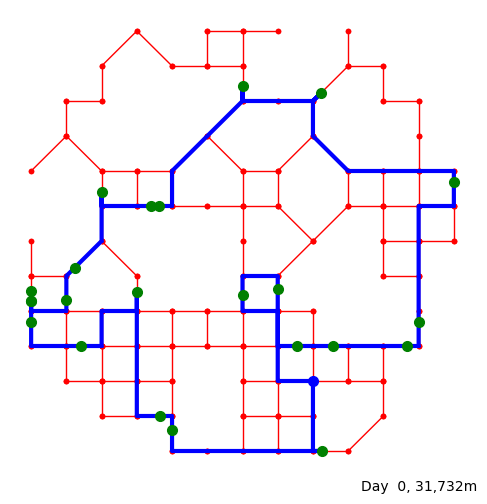

[ 0] 18:18:20.0 Driver leaves for delivery of 22 parcels
[ 0] 18:18:20.0 Driver drives to Customer: 106 (5264, 640)
[ 0] 18:23:23.4 Driver arrived at Customer: 106 (5264, 640)
[ 0] 18:24:38.1 Customer: 106 (5264, 640) answers door
[ 0] 18:24:38.1 Customer: 106 (5264, 640) accepts Parcel:  17 (106)
[ 0] 18:24:53.4 Customer: 106 (5264, 640) signs off
[ 0] 18:24:59.3 Driver drives to Customer: 50 (2880, 982)
[ 0] 18:35:53.6 Driver arrived at Customer: 50 (2880, 982)
[ 0] 18:36:17.2 Customer: 50 (2880, 982) answers door
[ 0] 18:36:17.2 Customer: 50 (2880, 982) accepts Parcel:  11 ( 50)
[ 0] 18:36:20.1 Customer: 50 (2880, 982) signs off
[ 0] 18:36:25.3 Driver drives to Customer: 48 (2691, 1200)
[ 0] 18:38:02.10 Driver arrived at Customer: 48 (2691, 1200)
[ 0] 18:39:55.1 Customer: 48 (2691, 1200) answers door
[ 0] 18:39:55.1 Customer: 48 (2691, 1200) accepts Parcel:  10 ( 48)
[ 0] 18:40:02.1 Customer: 48 (2691, 1200) signs off
[ 0] 18:40:32.3 Driver drives to Customer: 40 (2320, 3184)
[ 0] 1

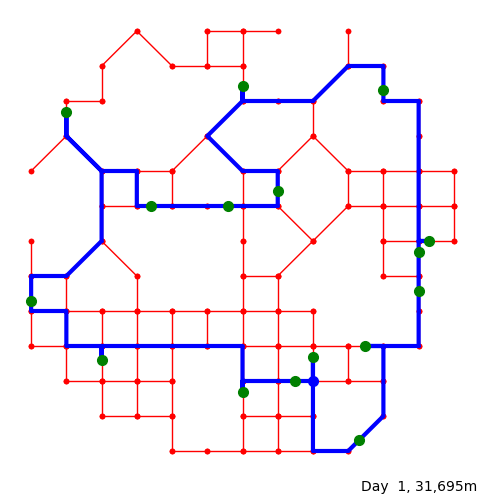

[ 1] 18:14:10.0 Driver leaves for delivery of 17 parcels
[ 1] 18:14:10.0 Driver drives to Customer: 101 (5120, 2144)
[ 1] 18:15:42.2 Driver arrived at Customer: 101 (5120, 2144)
[ 1] 18:16:24.9 Customer: 101 (5120, 2144) answers door
[ 1] 18:16:24.9 Customer: 101 (5120, 2144) accepts Parcel:  32 (101)
[ 1] 18:16:26.5 Customer: 101 (5120, 2144) signs off
[ 1] 18:16:40.4 Driver drives to Customer: 115 (5855, 815)
[ 1] 18:25:55.0 Driver arrived at Customer: 115 (5855, 815)
[ 1] 18:27:04.4 Customer: 115 (5855, 815) answers door
[ 1] 18:27:04.4 Customer: 115 (5855, 815) accepts Parcel:  33 (115)
[ 1] 18:27:55.1 Customer: 115 (5855, 815) signs off
[ 1] 18:28:13.1 Driver drives to Customer: 117 (5945, 2320)
[ 1] 18:36:03.2 Driver arrived at Customer: 117 (5945, 2320)
[ 1] 18:36:04.2 Customer: 117 (5945, 2320) answers door
[ 1] 18:36:04.2 Customer: 117 (5945, 2320) accepts Parcel:  34 (117)
[ 1] 18:36:04.10 Customer: 117 (5945, 2320) signs off
[ 1] 18:36:19.0 Driver drives to Customer: 137 (68

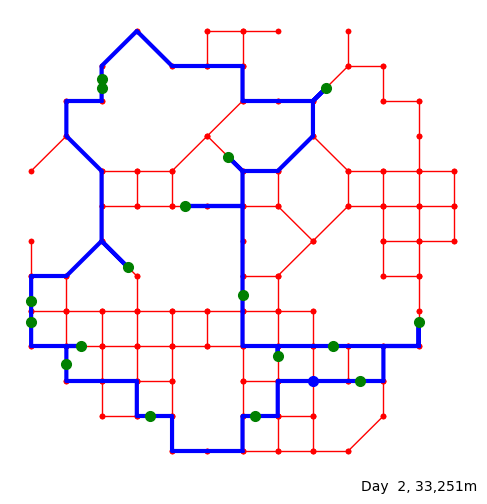

[ 2] 18:15:50.0 Driver leaves for delivery of 19 parcels
[ 2] 18:15:50.0 Driver drives to Customer: 82 (4197, 1200)
[ 2] 18:21:45.9 Driver arrived at Customer: 82 (4197, 1200)
[ 2] 18:22:03.2 Customer: 82 (4197, 1200) answers door
[ 2] 18:22:03.2 Customer: 82 (4197, 1200) accepts Parcel:  50 ( 82)
[ 2] 18:22:27.10 Customer: 82 (4197, 1200) accepts Parcel:  51 ( 82)
[ 2] 18:22:30.0 Customer: 82 (4197, 1200) signs off
[ 2] 18:22:55.2 Driver drives to Customer: 43 (2534, 1200)
[ 2] 18:34:03.1 Driver arrived at Customer: 43 (2534, 1200)
[ 2] 18:35:07.2 Customer: 43 (2534, 1200) answers door
[ 2] 18:35:07.2 Customer: 43 (2534, 1200) accepts Parcel:  46 ( 43)
[ 2] 18:35:22.5 Customer: 43 (2534, 1200) signs off
[ 2] 18:36:05.5 Driver drives to Customer:  7 (1200, 2038)
[ 2] 18:44:46.7 Driver arrived at Customer:  7 (1200, 2038)
[ 2] 18:45:22.2 Customer:  7 (1200, 2038) answers door
[ 2] 18:45:22.2 Customer:  7 (1200, 2038) accepts Parcel:  41 (  7)
[ 2] 18:45:26.4 Customer:  7 (1200, 2038) si

In [121]:
# simulating delivery over 3 days. 
n_days=3
random.seed(8268)
W = generateWarehouseLocation(M)
rec = simulation(M, W, C, p=0.15, days=n_days, log=True,seed=8268,plot=True)

In [123]:
# Serialize the Recorder object using pickle and write it to a file named 'recorder.pickle'
with open('recorder.pickle', 'wb') as f:
    pickle.dump(rec, f)

with open('recorder.pickle', 'wb') as f:
            pickle.dump(rec, f)

## 8 Plotting Routines

In [125]:
import scipy.stats as stats

def histplot(data, title="", xlabel="",
             width=None, height=None):
    # Calculate statistics of the data
    minx = min(data)  # Minimum value
    maxx = max(data)  # Maximum value
    μ = np.mean(data)  # Mean
    σ = np.std(data)  # Standard deviation
    
    # Create a new figure with specified width and height
    fig = plt.figure()
    fig.set_figwidth(width if width is not None else 4)
    fig.set_figheight(height if height is not None else 2.5)
    ax = fig.gca()  # Get current axes
    
    # Determine the number of bins for the histogram
    bins = (maxx - minx) // 5 + 1
    
    # Plot the histogram
    hist = plt.hist(data, density=True, bins=bins)
    plt.xlabel(xlabel)  # Set the label for the x-axis
    plt.ylabel('Density')  # Set the label for the y-axis
    plt.title(title)  # Set the title of the plot
    
    # Generate x-values for the normal distribution curve
    x = np.linspace(minx, maxx, 100)
    # Compute y-values for the normal distribution curve using mean and standard deviation
    y = [stats.norm(loc=μ, scale=σ).pdf(p) for p in x]
    
    # Plot the normal distribution curve
    ax.plot(x, y, lw=1, color='red')
    ax.axvline(x=μ, color='red')  # Add a vertical line at the mean
    maxy = max(max(y), max(hist[0]))  # Determine the maximum y-value for annotation
    # Annotate mean and standard deviation
    ax.text(maxx, maxy, f'μ={μ:2.2f}\nσ={σ:2.2f}', ha='right', va='top', color='red', fontsize=12)
    ax.grid(True)  # Add grid lines to the plot
    plt.show()  # Display the plot

# This function takes the data as input and generates a histogram with overlaid normal distribution curve, providing insights into the distribution of the data.

In [127]:
def dailyPlot(data, 
              title="", ylabel="",
              width=None, height=None):
    # Calculate the number of days
    days = len(data)
    
    # Create a new figure with specified width and height
    fig = plt.figure()
    fig.set_figwidth(width if width is not None else 6)
    fig.set_figheight(height if height is not None else 2)
    
    ax = fig.gca()  # Get current axes
    # Adjust the y-axis limits with a small margin
    diff = (max(data) - min(data)) * 0.1
    ymin = int(math.floor(min(data) - diff))
    ymax = int(math.ceil(max(data) + diff))
    ax.set_xlim(-1, days)  # Set the x-axis limits
    ax.set_ylim(ymin, ymax)  # Set the y-axis limits
    ax.grid(True)  # Add grid lines
    
    # Set marker size and line width based on data length
    ms = 2 if len(data) > 100 else 5
    lw = 0.5 if len(data) > 100 else 1

    # Generate x-values (days)
    x = np.arange(0, len(data))
    # Convert data to numpy array
    y = np.array([y for y in data])
    # Fit a linear polynomial to the data
    b, m = np.polynomial.polynomial.polyfit(x, y, 1)
    
    # Plot the data points
    plt.plot(x, y, 'bo-', linewidth=lw, markersize=ms)
    # Plot the linear fit
    plt.plot(x, m * x + b, 'r-')
    
    plt.xlabel('Day')  # Set the label for the x-axis
    plt.ylabel(ylabel)  # Set the label for the y-axis
    plt.title(title)  # Set the title of the plot
    plt.show()  # Display the plot

# This function plots daily data over a range of days, including a linear fit to the data points.
# It provides insights into the trend of the data over time.

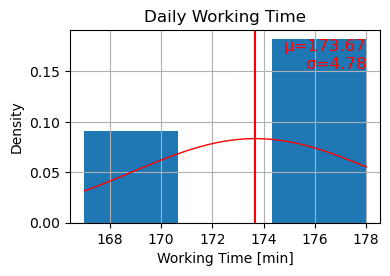

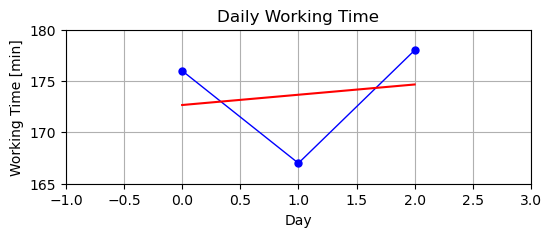

(173.66666666666666, 176.0, 5.859465277082315)

In [128]:
# Plot histogram of working time data stored in Recorder object
rec.histWorkingTime()

# Plot daily working time data stored in Recorder object
rec.plotWorkingTime()

# Calculate statistics (mean, median, and standard deviation) of working time data stored in Recorder object
rec.statsWorkingTime()

These functions are used to analyze and visualize the working time data recorded during the simulation. The histWorkingTime function plots a histogram of the working time data, providing an overview of its distribution. The plotWorkingTime function generates a line plot showing the daily working time over the simulation period. Finally, the statsWorkingTime function calculates and returns statistics such as the mean, median, and standard deviation of the working time data.

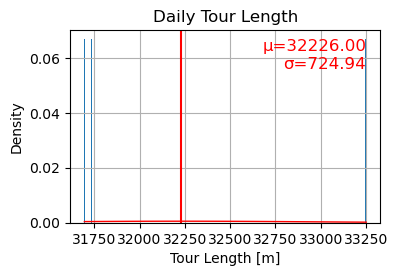

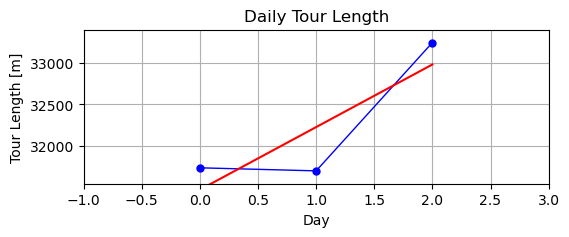

(32226.0, 31732.0, 887.8687966135537)

In [129]:
# Plot histogram of tour length data stored in Recorder object
rec.histTourLength()

# Plot daily tour length data stored in Recorder object
rec.plotTourLength()

# Calculate statistics (mean, median, and standard deviation) of tour length data stored in Recorder object
rec.statsTourLength()

These functions are used to analyze and visualize the tour length data recorded during the simulation. The histTourLength function plots a histogram of the tour length data, providing an overview of its distribution. The plotTourLength function generates a line plot showing the daily tour length over the simulation period. Finally, the statsTourLength function calculates and returns statistics such as the mean, median, and standard deviation of the tour length data.

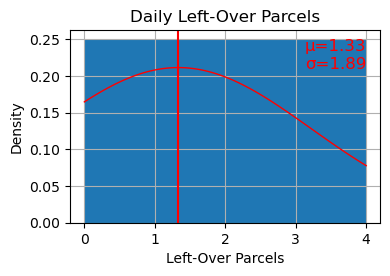

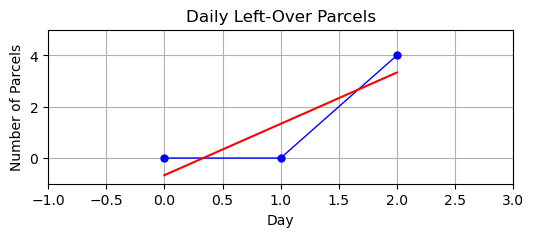

(1.3333333333333333, 0.0, 2.3094010767585034)

In [130]:
# Plot histogram of left-over parcels data stored in Recorder object
rec.histLeftOver()

# Plot daily left-over parcels data stored in Recorder object
rec.plotLeftOver()

# Calculate statistics (mean, median, and standard deviation) of left-over parcels data stored in Recorder object
rec.statsLeftOver()

These functions are used to analyze and visualize the left-over parcels data recorded during the simulation. The histLeftOver function plots a histogram of the left-over parcels data, providing insights into its distribution. The plotLeftOver function generates a line plot showing the daily left-over parcels over the simulation period. Finally, the statsLeftOver function calculates and returns statistics such as the mean, median, and standard deviation of the left-over parcels data.

In [131]:
# Print the report of time measurements recorded during the simulation
rec.reportTimer()

==== t:  23.24s Total
==== ΣΔt:  22.41s createLoop
==== ΣΔt:   0.49s addTarget


This function prints a report summarizing the time measurements recorded during the simulation run. It includes the total simulation time and the accumulated time for each specific activity or event tracked during the simulation, providing insights into the time spent on different tasks or processes.

In [132]:
# Access the daily records DataFrame from the Recorder object
rec.daily

,begin work at,end work at,dist,left,working time
0,64800,75400,31732,0,176
1,151200,161239,31695,0,167
2,237600,248324,33251,4,178


## 9 Optimisation

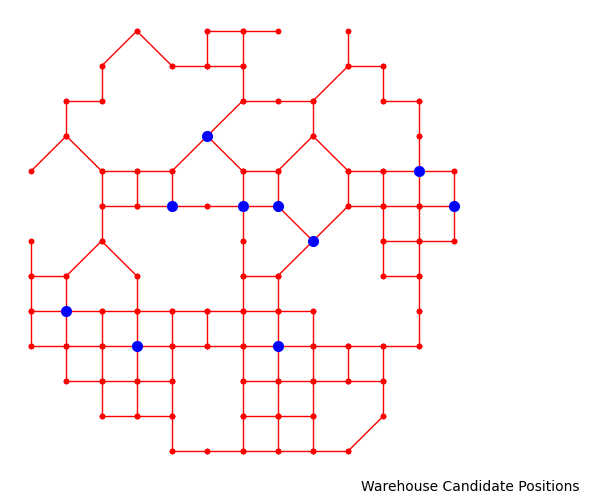

Simulate Delivery from Warehouse (6800,5120)
  improved position:   (6800,5120) f=31316.33
Simulate Delivery from Warehouse (4000,4560)
Simulate Delivery from Warehouse (5120,4000)
Simulate Delivery from Warehouse (4560,4560)
Simulate Delivery from Warehouse (2320,2320)
Simulate Delivery from Warehouse (4560,2320)
Simulate Delivery from Warehouse (7360,4560)
Simulate Delivery from Warehouse (1200,2880)
Simulate Delivery from Warehouse (3440,5680)
  improved position:   (3440,5680) f=31257.67
Simulate Delivery from Warehouse (2880,4560)


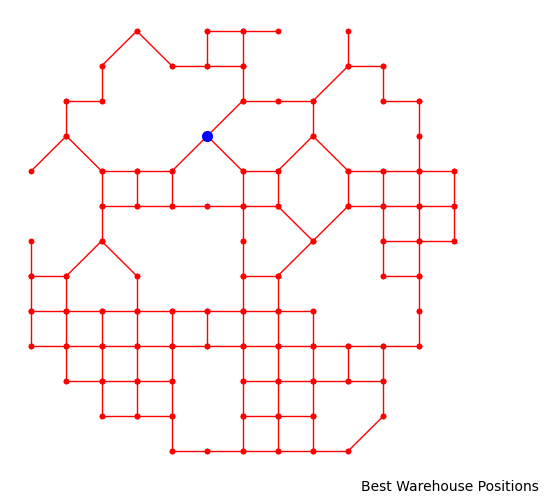

In [133]:
# Optimization routine to generate warehouse locations
import os

def generateWarehouseLocations(M, p):
    """
    Generates potential warehouse locations based on the provided graph and a probability parameter.

    Args:
    - M: Tuple containing vertices and edges of the graph
    - p: Probability parameter determining the proportion of potential warehouse locations

    Returns:
    - List of potential warehouse locations sampled from the vertices of the graph
    """
    # Function to count the number of edges incident to a vertex
    def numberOfEdges(v, E):
        count = 0
        for e in E:
            if e[0] == v or e[1] == v:
                count += 1
        return count

    V, E = M
    # Select vertices with more than 2 incident edges as potential warehouse locations
    W = [v for v in V if numberOfEdges(v, E) > 2]
    # Sample from potential warehouse locations based on probability parameter
    return random.sample(W, k=int(round(len(W) * p)))

def formatLocation(w):
    """
    Formats a warehouse location as a string.

    Args:
    - w: Tuple representing the coordinates of the warehouse location

    Returns:
    - Formatted string representing the warehouse location
    """
    return f"({w[0]:4d},{w[1]:4d})"

def objectiveFunction(w, seed, days, p):
    """
    Objective function to simulate delivery from a warehouse location and evaluate tour length.

    Args:
    - w: Tuple representing the coordinates of the warehouse location
    - seed: Seed value for random number generation
    - days: Number of days for simulation
    - p: Probability parameter for the proportion of potential warehouse locations

    Returns:
    - Mean tour length from the simulation
    """
    random.seed(seed)
    # Generate title for simulation based on warehouse location
    title = "Simulate Delivery from Warehouse " + formatLocation(w)
    # Simulate delivery from the warehouse location
    rec = simulation(M, w, C, p=p, days=days, title=title)
    # Define filename for saving simulation results
    filename = "recorder/rec_w=" + formatLocation(w) + ".pickled"
    
    # Check if directory exists, create it if not
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Serialize recorder object and save to file
    with open(filename, 'wb') as f:
        pickle.dump(rec, f)
    # Return mean tour length from simulation
    return rec.statsTourLength()[0]

def monteCarlo(M, p, days, seed):
    """
    Monte Carlo optimization routine to find the best warehouse location.

    Args:
    - M: Tuple containing vertices and edges of the graph
    - p: Probability parameter for the proportion of potential warehouse locations
    - days: Number of days for simulation
    - seed: Seed value for random number generation

    Returns:
    - List of best warehouse locations based on the optimization
    """
    # Generate potential warehouse locations
    W = generateWarehouseLocations(M, p)
    # Plot potential warehouse locations on the map
    plotMap(M, T=W, styleT='bo', msT=7, text="Warehouse Candidate Positions")

    minW, minP = None, math.inf
    for w in W:
        # Evaluate objective function for each warehouse location
        f = objectiveFunction(w, seed, days, p)
        if f < minP:
            print(f"  improved position:   {formatLocation(w):s} f={f:7.2f}")
            minW, minP = [w], f
        elif f == minP:
            print(f"  equivalent position: {formatLocation(w):s} f={f:7.2f}")
            minW.append(w)
    
    # Return best warehouse locations
    return minW

# Set seed for random number generation
seed = 8268
random.seed(seed)
# Perform Monte Carlo optimization to find the best warehouse location
W = monteCarlo(M, p=0.15, days=3, seed=seed)
# Plot the best warehouse locations on the map
plotMap(M, T=W, styleT='bo', msT=7, text='Best Warehouse Positions')